# **Layer-Wise Training With Separation Index(SI)**

## Part B: Layer-wise training:

### Importing Libraries:

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Dense,Softmax ,Dropout, Conv2D, MaxPooling2D, Flatten
from keras.activations import relu
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from keras.models import load_model
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import Data:

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


Select a Subset For SI Calculation:

In [ ]:
_, X_subset, _, y_subset = train_test_split(x_test, y_test, test_size=0.10, random_state=0)
Class = np.zeros(10)
for i in range(len( y_subset)):
  Class[y_subset[i]] = Class[y_subset[i]] + 1
Class = pd.DataFrame(Class)
print("The number of each class members in the subset:")
Class

The number of each class members in the subset:


,0
0,92.0
1,98.0
2,97.0
3,99.0
4,104.0
5,105.0
6,102.0
7,95.0
8,99.0
9,109.0


Define SI Operator with The Help of Nearest Neighbor classifier:

In [ ]:
def SI(x_embed,y_embed):  
  x_embed = np.array(x_embed)
  si = KNeighborsClassifier(n_neighbors=1)
  cont = 0
  for i in range (len(y_embed)):
    x_emb =np.delete(x_embed, i, 0)
    y_emb =np.delete(y_embed, i, 0)
    si.fit(x_emb, y_emb.reshape(len(y_embed)-1))
    emb = x_embed[i].reshape(1 ,len(x_embed[i]))
    if(si.predict(emb)==y_embed[i]):
      cont = cont+1
  return cont/len(y_embed)

One Hot Encoding:

In [ ]:
y_train_code=np.zeros((50000,10))
for i in range (0,50000):
  for j in range (0,10):
    if (y_train[i]==j):
      y_train_code[i,j]=1
y_test_code=np.zeros((10000,10))
for i in range (0,10000):
  for j in range (0,10):
    if (y_test[i]==j):
      y_test_code[i,j]=1

Normalization:

In [ ]:
x_train_n = x_train/255
x_test_n = x_test/255
X_subset_n = X_subset/255

### Stage 1:

Define Model For Learning:

In [ ]:
S_1= Sequential()
#L1:
S_1.add(Conv2D(filters = 64, kernel_size = 3, strides=(1, 1), padding="same", activation='relu',input_shape=(32, 32, 3)))
S_1.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#FC:
S_1.add(Flatten())
S_1.add(Dense(10))
S_1.add(Softmax(axis=1))

sgd = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
S_1.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
S_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 16384)             0         
                                                                 
 dense (Dense)               (None, 10)                163850    
                                                                 
 softmax (Softmax)           (None, 10)                0         
                                                                 
Total params: 165,642
Trainable params: 165,642
Non-trainable params: 0
__________________________________________________

Training:

In [ ]:
Epoch =  50
history_S_1=S_1.fit(x=x_train_n,y=y_train_code, batch_size=256 , epochs=Epoch,validation_data=(x_test_n,y_test_code))

Epoch 1/50
196/196 [==============================] - 13s 18ms/step - loss: 1.8907 - accuracy: 0.3351 - val_loss: 1.6745 - val_accuracy: 0.4152
Epoch 2/50
196/196 [==============================] - 3s 14ms/step - loss: 1.5634 - accuracy: 0.4565 - val_loss: 1.4662 - val_accuracy: 0.4863
Epoch 3/50
196/196 [==============================] - 2s 10ms/step - loss: 1.3949 - accuracy: 0.5139 - val_loss: 1.3707 - val_accuracy: 0.5142
Epoch 4/50
196/196 [==============================] - 2s 12ms/step - loss: 1.3008 - accuracy: 0.5471 - val_loss: 1.2928 - val_accuracy: 0.5376
Epoch 5/50
196/196 [==============================] - 2s 12ms/step - loss: 1.2460 - accuracy: 0.5682 - val_loss: 1.2458 - val_accuracy: 0.5687
Epoch 6/50
196/196 [==============================] - 2s 11ms/step - loss: 1.2068 - accuracy: 0.5819 - val_loss: 1.2528 - val_accuracy: 0.5640
Epoch 7/50
196/196 [==============================] - 2s 11ms/step - loss: 1.1690 - accuracy: 0.5953 - val_loss: 1.2078 - val_accuracy: 0.579

In [ ]:
S_1.save('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW3/Model/B/S_1.h5')

Plot Loss And Accuracy:

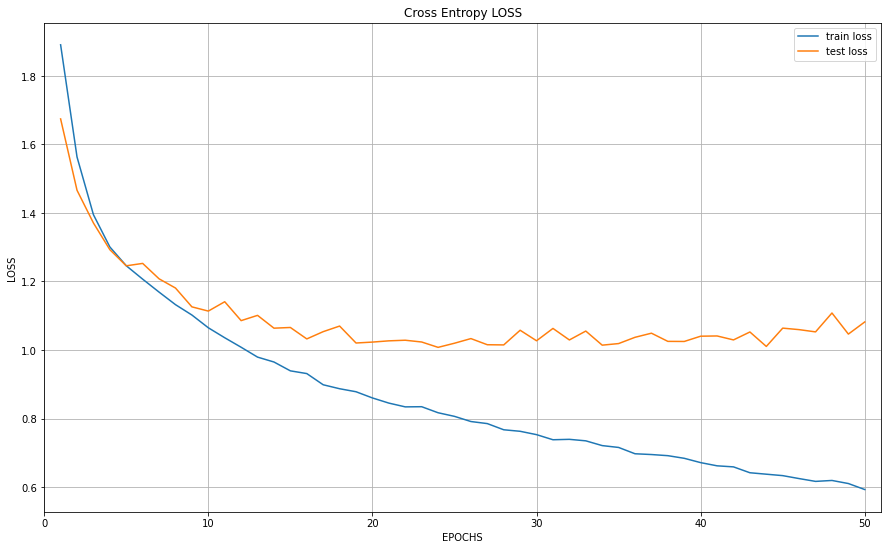

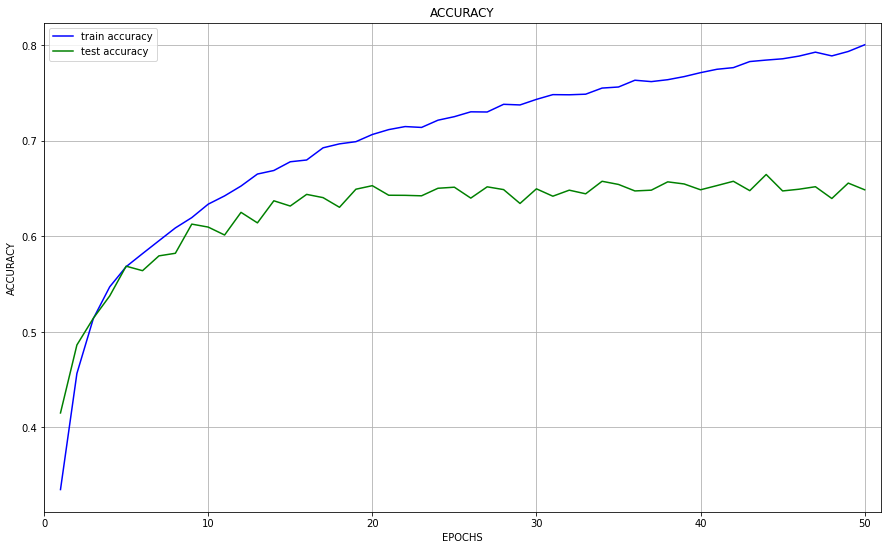

In [ ]:
loss=history_S_1.history['loss']
val_loss=history_S_1.history['val_loss']
acc=history_S_1.history['accuracy']
val_acc=history_S_1.history['val_accuracy']
EPOCH= range(1,Epoch + 1)

plt.gcf().set_size_inches(15,9,forward=True)
plt.plot(EPOCH,loss)
plt.plot(EPOCH,val_loss)
plt.title('Cross Entropy LOSS')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.grid()
plt.xlim([0,Epoch + 1])
plt.legend(['train loss','test loss'])
plt.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW3/Pic/S1los_b.jpg')
plt.show()
print(3*'\n')
print(3*'\n')
plt.gcf().set_size_inches(15,9,forward=True)
plt.plot(EPOCH,acc,color='b')
plt.plot(EPOCH,val_acc,color='g')
plt.title('ACCURACY')
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.grid()
plt.xlim([0,Epoch + 1])
plt.legend(['train accuracy','test accuracy'])
plt.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW3/Pic/S1ac_b.jpg')
plt.show()

Define Model For SI Calculation:

In [ ]:
L_1= Sequential()
#L1:
L_1.add(Conv2D(filters = 64, kernel_size = 3, strides=(1, 1), padding="same", activation='relu',input_shape=(32, 32, 3)))
L_1.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
L_1.add(Flatten())

# set weights:

w1 = S_1.layers[0].get_weights()[0]
b1 = S_1.layers[0].get_weights()[1]
L_1.layers[0].set_weights([w1,b1])


Embeding Space:

In [ ]:
emb_1 = L_1(X_subset_n)

Calculation of SI:

In [ ]:
SI(emb_1,y_subset)

0.237

### Stage 2:

Define Model For Learning:

In [ ]:
S_2= Sequential()
#L1:
S_2.add(Conv2D(filters = 64, kernel_size = 3, strides=(1, 1), padding="same", activation='relu',input_shape=(32, 32, 3)))
S_2.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#L2:
S_2.add(Conv2D(filters = 128, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
S_2.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#FC:
S_2.add(Flatten())
S_2.add(Dense(10))
S_2.add(Softmax(axis=1))

#Freezing:
w1 = S_1.layers[0].get_weights()[0]
b1 = S_1.layers[0].get_weights()[1]
S_2.layers[0].set_weights([w1,b1])

S_2.layers[0].trainable = False


sgd = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
S_2.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
S_2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 8192)              0         
                                                                 
 dense_3 (Dense)             (None, 10)               

In [ ]:
Epoch =  50
history_S_2=S_2.fit(x=x_train_n,y=y_train_code, batch_size=256 , epochs=Epoch,validation_data=(x_test_n,y_test_code))

Epoch 1/50
196/196 [==============================] - 3s 15ms/step - loss: 1.2828 - accuracy: 0.5512 - val_loss: 1.0446 - val_accuracy: 0.6392
Epoch 2/50
196/196 [==============================] - 2s 13ms/step - loss: 0.9467 - accuracy: 0.6773 - val_loss: 1.0060 - val_accuracy: 0.6531
Epoch 3/50
196/196 [==============================] - 3s 13ms/step - loss: 0.8491 - accuracy: 0.7090 - val_loss: 0.8977 - val_accuracy: 0.6903
Epoch 4/50
196/196 [==============================] - 2s 13ms/step - loss: 0.7745 - accuracy: 0.7364 - val_loss: 0.8355 - val_accuracy: 0.7135
Epoch 5/50
196/196 [==============================] - 2s 13ms/step - loss: 0.7191 - accuracy: 0.7561 - val_loss: 0.8042 - val_accuracy: 0.7235
Epoch 6/50
196/196 [==============================] - 3s 13ms/step - loss: 0.6760 - accuracy: 0.7704 - val_loss: 0.8059 - val_accuracy: 0.7256
Epoch 7/50
196/196 [==============================] - 2s 13ms/step - loss: 0.6321 - accuracy: 0.7859 - val_loss: 0.8127 - val_accuracy: 0.7203

In [ ]:
S_2.save('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW3/Model/B/S_2.h5')

Plot Loss And Accuracy:

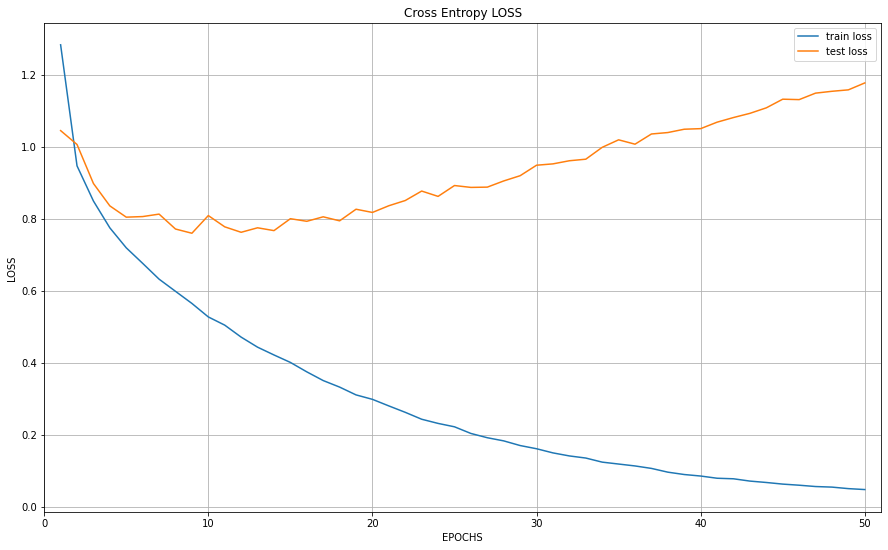

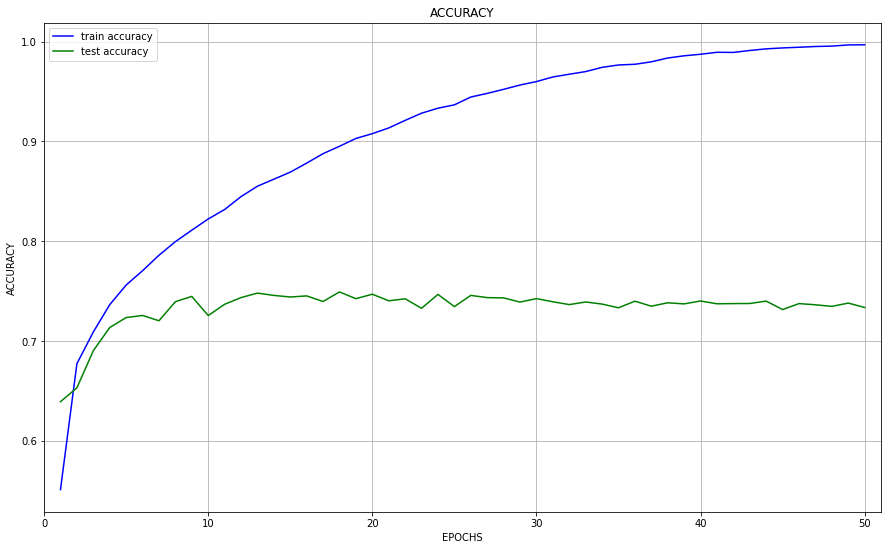

In [ ]:
loss=history_S_2.history['loss']
val_loss=history_S_2.history['val_loss']
acc=history_S_2.history['accuracy']
val_acc=history_S_2.history['val_accuracy']
EPOCH= range(1,Epoch + 1)

plt.gcf().set_size_inches(15,9,forward=True)
plt.plot(EPOCH,loss)
plt.plot(EPOCH,val_loss)
plt.title('Cross Entropy LOSS')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.grid()
plt.xlim([0,Epoch + 1])
plt.legend(['train loss','test loss'])
plt.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW3/Pic/S2los_b.jpg')
plt.show()
print(3*'\n')
print(3*'\n')
plt.gcf().set_size_inches(15,9,forward=True)
plt.plot(EPOCH,acc,color='b')
plt.plot(EPOCH,val_acc,color='g')
plt.title('ACCURACY')
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.grid()
plt.xlim([0,Epoch + 1])
plt.legend(['train accuracy','test accuracy'])
plt.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW3/Pic/S2ac_b.jpg')
plt.show()

In [ ]:
L_2= Sequential()
#L1:
L_2.add(Conv2D(filters = 64, kernel_size = 3, strides=(1, 1), padding="same", activation='relu',input_shape=(32, 32, 3)))
L_2.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
#L2:
L_2.add(Conv2D(filters = 128, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
L_2.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

L_2.add(Flatten())

# set weights:

w1 = S_2.layers[0].get_weights()[0]
b1 = S_2.layers[0].get_weights()[1]
w2 = S_2.layers[2].get_weights()[0]
b2 = S_2.layers[2].get_weights()[1]
L_2.layers[0].set_weights([w1,b1])
L_2.layers[2].set_weights([w2,b2])



Embeding Space:

In [ ]:
emb_2 = L_2(X_subset_n)

Calculation of SI:

In [ ]:
SI(emb_2,y_subset)

0.309

### Stage 3:

Define Model For Learning:

In [ ]:
S_3= Sequential()
#L1:
S_3.add(Conv2D(filters = 64, kernel_size = 3, strides=(1, 1), padding="same", activation='relu',input_shape=(32, 32, 3)))
S_3.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#L2:
S_3.add(Conv2D(filters = 128, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
S_3.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#L3:
S_3.add(Conv2D(filters = 256, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))

#FC:
S_3.add(Flatten())
S_3.add(Dense(10))
S_3.add(Softmax(axis=1))

#Freezing:
w2 = S_2.layers[2].get_weights()[0]
b2 = S_2.layers[2].get_weights()[1]
w1 = S_2.layers[0].get_weights()[0]
b1 = S_2.layers[0].get_weights()[1]
S_3.layers[0].set_weights([w1,b1])
S_3.layers[2].set_weights([w2,b2])

S_3.layers[0].trainable = False
S_3.layers[2].trainable = False

sgd = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
S_3.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
S_3.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 8, 8, 256)         295168    
                                                                 
 flatten_10 (Flatten)        (None, 16384)           

In [ ]:
Epoch =  50
history_S_3=S_3.fit(x=x_train_n,y=y_train_code, batch_size=256 , epochs=Epoch,validation_data=(x_test_n,y_test_code))

Epoch 1/50
196/196 [==============================] - 5s 23ms/step - loss: 0.9431 - accuracy: 0.6722 - val_loss: 0.7647 - val_accuracy: 0.7394
Epoch 2/50
196/196 [==============================] - 3s 16ms/step - loss: 0.5932 - accuracy: 0.7977 - val_loss: 0.7462 - val_accuracy: 0.7482
Epoch 3/50
196/196 [==============================] - 3s 15ms/step - loss: 0.4671 - accuracy: 0.8402 - val_loss: 0.7064 - val_accuracy: 0.7643
Epoch 4/50
196/196 [==============================] - 3s 13ms/step - loss: 0.3653 - accuracy: 0.8792 - val_loss: 0.6977 - val_accuracy: 0.7706
Epoch 5/50
196/196 [==============================] - 3s 17ms/step - loss: 0.2933 - accuracy: 0.9060 - val_loss: 0.7353 - val_accuracy: 0.7614
Epoch 6/50
196/196 [==============================] - 3s 17ms/step - loss: 0.2364 - accuracy: 0.9286 - val_loss: 0.7537 - val_accuracy: 0.7622
Epoch 7/50
196/196 [==============================] - 3s 16ms/step - loss: 0.1914 - accuracy: 0.9451 - val_loss: 0.7319 - val_accuracy: 0.7749

In [ ]:
S_3.save('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW3/Model/B/S_3.h5')

Plot Loss And Accuracy:

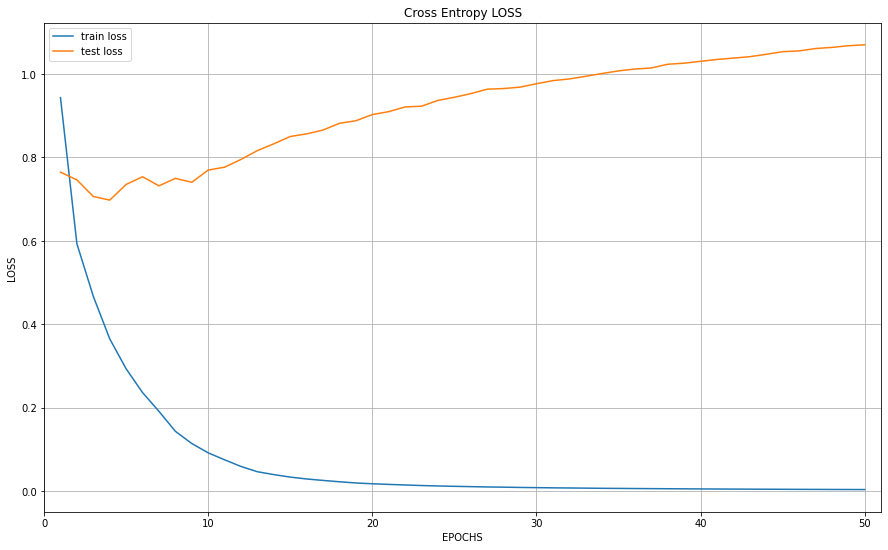

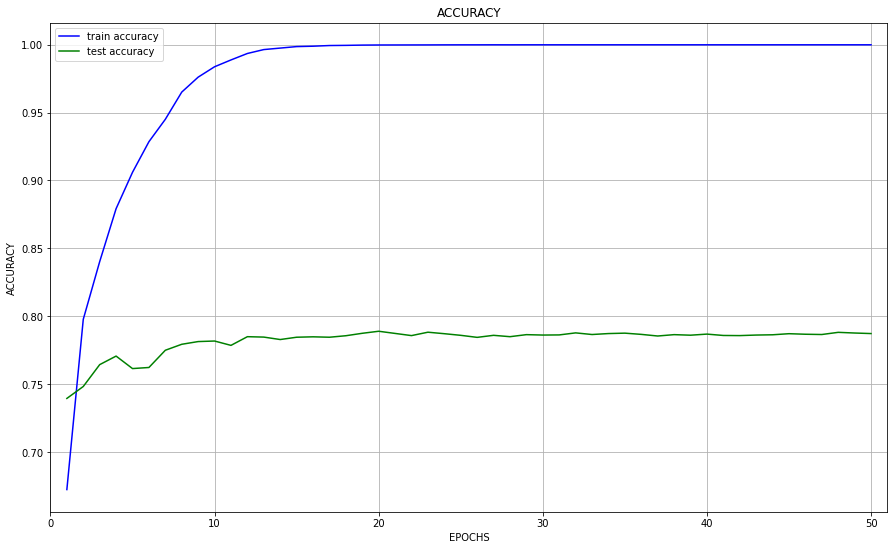

In [ ]:
loss=history_S_3.history['loss']
val_loss=history_S_3.history['val_loss']
acc=history_S_3.history['accuracy']
val_acc=history_S_3.history['val_accuracy']
EPOCH= range(1,Epoch + 1)

plt.gcf().set_size_inches(15,9,forward=True)
plt.plot(EPOCH,loss)
plt.plot(EPOCH,val_loss)
plt.title('Cross Entropy LOSS')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.grid()
plt.xlim([0,Epoch + 1])
plt.legend(['train loss','test loss'])
plt.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW3/Pic/S3los_b.jpg')
plt.show()
print(3*'\n')
print(3*'\n')
plt.gcf().set_size_inches(15,9,forward=True)
plt.plot(EPOCH,acc,color='b')
plt.plot(EPOCH,val_acc,color='g')
plt.title('ACCURACY')
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.grid()
plt.xlim([0,Epoch + 1])
plt.legend(['train accuracy','test accuracy'])
plt.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW3/Pic/S3ac_b.jpg')
plt.show()

In [ ]:
L_3= Sequential()
#L1:
L_3.add(Conv2D(filters = 64, kernel_size = 3, strides=(1, 1), padding="same", activation='relu',input_shape=(32, 32, 3)))
L_3.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
#L2:
L_3.add(Conv2D(filters = 128, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
L_3.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
#L3:
L_3.add(Conv2D(filters = 256, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))

L_3.add(Flatten())

# set weights:

w1 = S_3.layers[0].get_weights()[0]
b1 = S_3.layers[0].get_weights()[1]
w2 = S_3.layers[2].get_weights()[0]
b2 = S_3.layers[2].get_weights()[1]
w3 = S_3.layers[4].get_weights()[0]
b3 = S_3.layers[4].get_weights()[1]
L_3.layers[0].set_weights([w1,b1])
L_3.layers[2].set_weights([w2,b2])
L_3.layers[4].set_weights([w3,b3])


Embeding Space:

In [ ]:
emb_3 = L_3(X_subset_n)

Calculation of SI:

In [ ]:
SI(emb_3,y_subset)

0.378

In [ ]:
S_3 = load_model('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW3/Model/B/S_3.h5')

### Stage 4:

Define Model For Learning:

In [ ]:
S_4= Sequential()
#L1:
S_4.add(Conv2D(filters = 64, kernel_size = 3, strides=(1, 1), padding="same", activation='relu',input_shape=(32, 32, 3)))
S_4.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#L2:
S_4.add(Conv2D(filters = 128, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
S_4.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#L3:
S_4.add(Conv2D(filters = 256, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))

#L4:
S_4.add(Conv2D(filters = 256, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
S_4.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))


#FC:
S_4.add(Flatten())
S_4.add(Dense(10))
S_4.add(Softmax(axis=1))

#Freezing:
w3 = S_3.layers[4].get_weights()[0]
b3 = S_3.layers[4].get_weights()[1]
w2 = S_3.layers[2].get_weights()[0]
b2 = S_3.layers[2].get_weights()[1]
w1 = S_3.layers[0].get_weights()[0]
b1 = S_3.layers[0].get_weights()[1]
S_4.layers[0].set_weights([w1,b1])
S_4.layers[2].set_weights([w2,b2])
S_4.layers[4].set_weights([w3,b3])

S_4.layers[0].trainable = False
S_4.layers[2].trainable = False
S_4.layers[4].trainable = False

sgd = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
S_4.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
S_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 256)         5

In [ ]:
Epoch =  50
history_S_4=S_4.fit(x=x_train_n,y=y_train_code, batch_size=256 , epochs=Epoch,validation_data=(x_test_n,y_test_code))

Epoch 1/50
196/196 [==============================] - 15s 23ms/step - loss: 0.8012 - accuracy: 0.7219 - val_loss: 0.7024 - val_accuracy: 0.7617
Epoch 2/50
196/196 [==============================] - 3s 16ms/step - loss: 0.4582 - accuracy: 0.8418 - val_loss: 0.6692 - val_accuracy: 0.7808
Epoch 3/50
196/196 [==============================] - 3s 15ms/step - loss: 0.3310 - accuracy: 0.8891 - val_loss: 0.6557 - val_accuracy: 0.7814
Epoch 4/50
196/196 [==============================] - 3s 17ms/step - loss: 0.2397 - accuracy: 0.9233 - val_loss: 0.6588 - val_accuracy: 0.7888
Epoch 5/50
196/196 [==============================] - 3s 16ms/step - loss: 0.1714 - accuracy: 0.9512 - val_loss: 0.6885 - val_accuracy: 0.7921
Epoch 6/50
196/196 [==============================] - 3s 18ms/step - loss: 0.1254 - accuracy: 0.9684 - val_loss: 0.6841 - val_accuracy: 0.7966
Epoch 7/50
196/196 [==============================] - 3s 16ms/step - loss: 0.0860 - accuracy: 0.9842 - val_loss: 0.7236 - val_accuracy: 0.793

In [ ]:
S_4.save('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW3/Model/B/S_4.h5')

Plot Loss And Accuracy:

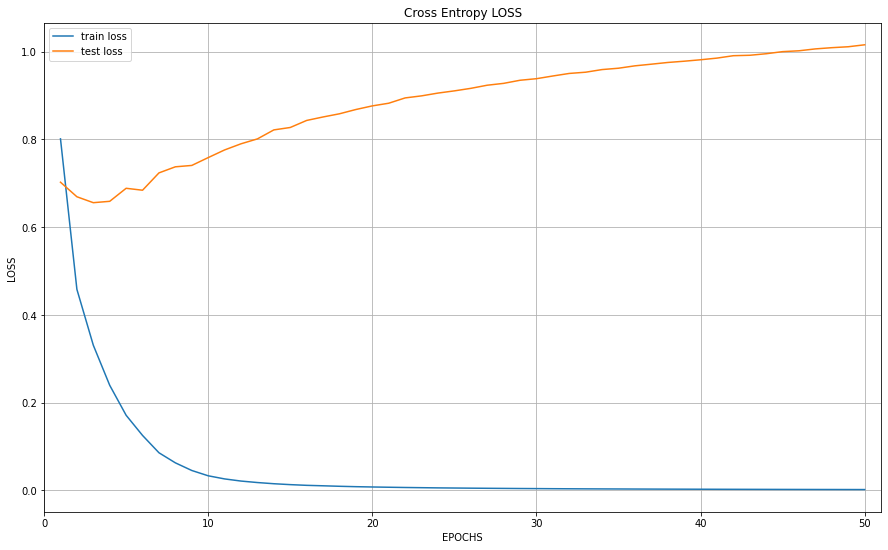

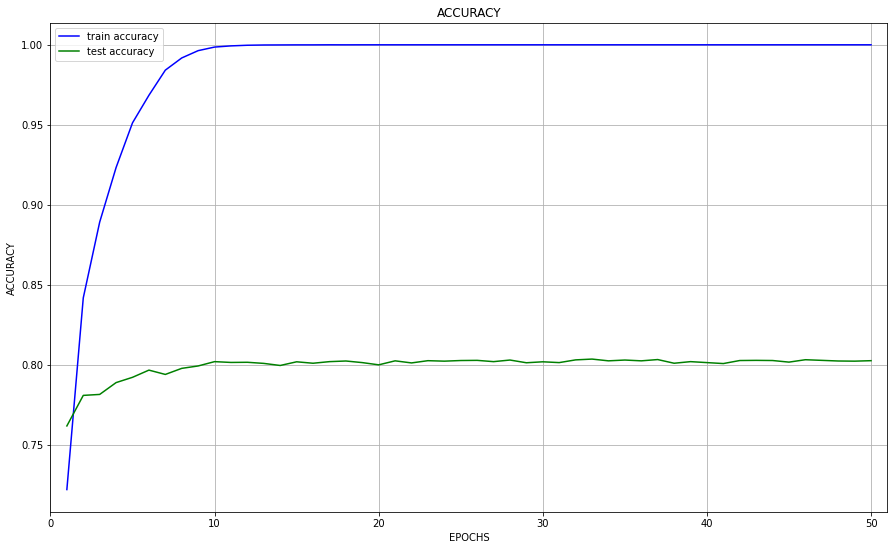

In [ ]:
loss=history_S_4.history['loss']
val_loss=history_S_4.history['val_loss']
acc=history_S_4.history['accuracy']
val_acc=history_S_4.history['val_accuracy']
EPOCH= range(1,Epoch + 1)

plt.gcf().set_size_inches(15,9,forward=True)
plt.plot(EPOCH,loss)
plt.plot(EPOCH,val_loss)
plt.title('Cross Entropy LOSS')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.grid()
plt.xlim([0,Epoch + 1])
plt.legend(['train loss','test loss'])
plt.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW3/Pic/S4los_b.jpg')
plt.show()
print(3*'\n')
print(3*'\n')
plt.gcf().set_size_inches(15,9,forward=True)
plt.plot(EPOCH,acc,color='b')
plt.plot(EPOCH,val_acc,color='g')
plt.title('ACCURACY')
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.grid()
plt.xlim([0,Epoch + 1])
plt.legend(['train accuracy','test accuracy'])
plt.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW3/Pic/S4ac_b.jpg')
plt.show()

In [ ]:
L_4= Sequential()
#L1:
L_4.add(Conv2D(filters = 64, kernel_size = 3, strides=(1, 1), padding="same", activation='relu',input_shape=(32, 32, 3)))
L_4.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
#L2:
L_4.add(Conv2D(filters = 128, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
L_4.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
#L3:
L_4.add(Conv2D(filters = 256, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))

#L4:
L_4.add(Conv2D(filters = 256, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
L_4.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

L_4.add(Flatten())

# set weights:

w1 = S_4.layers[0].get_weights()[0]
b1 = S_4.layers[0].get_weights()[1]
w2 = S_4.layers[2].get_weights()[0]
b2 = S_4.layers[2].get_weights()[1]
w3 = S_4.layers[4].get_weights()[0]
b3 = S_4.layers[4].get_weights()[1]
w4 = S_4.layers[5].get_weights()[0]
b4 = S_4.layers[5].get_weights()[1]
L_4.layers[0].set_weights([w1,b1])
L_4.layers[2].set_weights([w2,b2])
L_4.layers[4].set_weights([w3,b3])
L_4.layers[5].set_weights([w4,b4])


Embeding Space:

In [ ]:
emb_4 = L_4(X_subset_n)

Calculation of SI:

In [ ]:
SI(emb_4,y_subset)

0.507

### Stage 5:

Define Model For Learning:

In [ ]:
S_5= Sequential()
#L1:
S_5.add(Conv2D(filters = 64, kernel_size = 3, strides=(1, 1), padding="same", activation='relu',input_shape=(32, 32, 3)))
S_5.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#L2:
S_5.add(Conv2D(filters = 128, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
S_5.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#L3:
S_5.add(Conv2D(filters = 256, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))

#L4:
S_5.add(Conv2D(filters = 256, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
S_5.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#L5:
S_5.add(Conv2D(filters = 512, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))


#FC:
S_5.add(Flatten())
S_5.add(Dense(10))
S_5.add(Softmax(axis=1))

#Freezing:
w4 = S_4.layers[5].get_weights()[0]
b4 = S_4.layers[5].get_weights()[1]
w3 = S_4.layers[4].get_weights()[0]
b3 = S_4.layers[4].get_weights()[1]
w2 = S_4.layers[2].get_weights()[0]
b2 = S_4.layers[2].get_weights()[1]
w1 = S_4.layers[0].get_weights()[0]
b1 = S_4.layers[0].get_weights()[1]
S_5.layers[0].set_weights([w1,b1])
S_5.layers[2].set_weights([w2,b2])
S_5.layers[4].set_weights([w3,b3])
S_5.layers[5].set_weights([w4,b4])

S_5.layers[0].trainable = False
S_5.layers[2].trainable = False
S_5.layers[4].trainable = False
S_5.layers[5].trainable = False

sgd = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
S_5.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
S_5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 8, 8, 256)         295168    
                                                                 
 conv2d_15 (Conv2D)          (None, 8, 8, 256)        

In [ ]:
Epoch =  50
history_S_5=S_5.fit(x=x_train_n,y=y_train_code, batch_size=256 , epochs=Epoch,validation_data=(x_test_n,y_test_code))

Epoch 1/50
196/196 [==============================] - 4s 18ms/step - loss: 0.5140 - accuracy: 0.8262 - val_loss: 0.7835 - val_accuracy: 0.7747
Epoch 2/50
196/196 [==============================] - 3s 16ms/step - loss: 0.1254 - accuracy: 0.9634 - val_loss: 0.7962 - val_accuracy: 0.7917
Epoch 3/50
196/196 [==============================] - 3s 17ms/step - loss: 0.0497 - accuracy: 0.9920 - val_loss: 0.8730 - val_accuracy: 0.7892
Epoch 4/50
196/196 [==============================] - 3s 17ms/step - loss: 0.0232 - accuracy: 0.9988 - val_loss: 0.8920 - val_accuracy: 0.7978
Epoch 5/50
196/196 [==============================] - 3s 16ms/step - loss: 0.0142 - accuracy: 0.9999 - val_loss: 0.9345 - val_accuracy: 0.7966
Epoch 6/50
196/196 [==============================] - 3s 18ms/step - loss: 0.0104 - accuracy: 0.9999 - val_loss: 0.9647 - val_accuracy: 0.7979
Epoch 7/50
196/196 [==============================] - 4s 18ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.9857 - val_accuracy: 0.7993

In [ ]:
S_5.save('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW3/Model/B/S_5.h5')

Plot Loss And Accuracy:

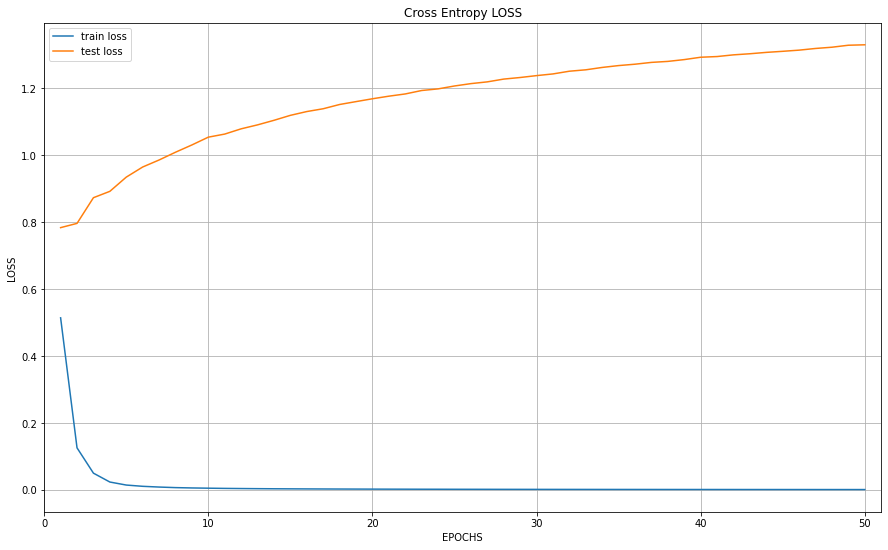

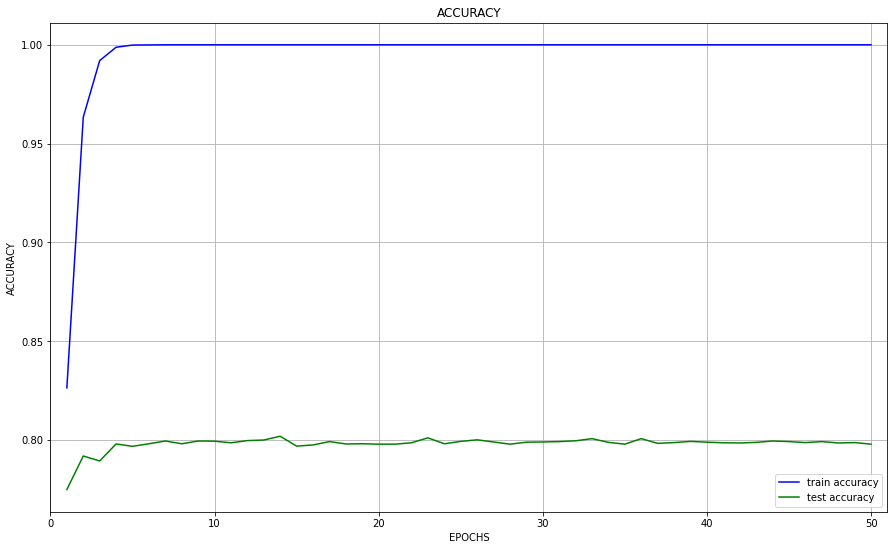

In [ ]:
loss=history_S_5.history['loss']
val_loss=history_S_5.history['val_loss']
acc=history_S_5.history['accuracy']
val_acc=history_S_5.history['val_accuracy']
EPOCH= range(1,Epoch + 1)

plt.gcf().set_size_inches(15,9,forward=True)
plt.plot(EPOCH,loss)
plt.plot(EPOCH,val_loss)
plt.title('Cross Entropy LOSS')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.grid()
plt.xlim([0,Epoch + 1])
plt.legend(['train loss','test loss'])
plt.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW3/Pic/S5los_b.jpg')
plt.show()
print(3*'\n')
print(3*'\n')
plt.gcf().set_size_inches(15,9,forward=True)
plt.plot(EPOCH,acc,color='b')
plt.plot(EPOCH,val_acc,color='g')
plt.title('ACCURACY')
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.grid()
plt.xlim([0,Epoch + 1])
plt.legend(['train accuracy','test accuracy'])
plt.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW3/Pic/S5ac_b.jpg')
plt.show()

In [ ]:
L_5= Sequential()
#L1:
L_5.add(Conv2D(filters = 64, kernel_size = 3, strides=(1, 1), padding="same", activation='relu',input_shape=(32, 32, 3)))
L_5.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
#L2:
L_5.add(Conv2D(filters = 128, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
L_5.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
#L3:
L_5.add(Conv2D(filters = 256, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))

#L4:
L_5.add(Conv2D(filters = 256, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
L_5.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#L5:
L_5.add(Conv2D(filters = 512, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))

L_5.add(Flatten())

# set weights:

w1 = S_5.layers[0].get_weights()[0]
b1 = S_5.layers[0].get_weights()[1]
w2 = S_5.layers[2].get_weights()[0]
b2 = S_5.layers[2].get_weights()[1]
w3 = S_5.layers[4].get_weights()[0]
b3 = S_5.layers[4].get_weights()[1]
w4 = S_5.layers[5].get_weights()[0]
b4 = S_5.layers[5].get_weights()[1]
w5 = S_5.layers[7].get_weights()[0]
b5 = S_5.layers[7].get_weights()[1]
L_5.layers[0].set_weights([w1,b1])
L_5.layers[2].set_weights([w2,b2])
L_5.layers[4].set_weights([w3,b3])
L_5.layers[5].set_weights([w4,b4])
L_5.layers[7].set_weights([w5,b5])

Embeding Space:

In [ ]:
emb_5 = L_5(X_subset_n)

Calculation of SI:

In [ ]:
SI(emb_5,y_subset)

0.584

### Stage 6:

Define Model For Learning:

In [ ]:
S_6= Sequential()
#L1:
S_6.add(Conv2D(filters = 64, kernel_size = 3, strides=(1, 1), padding="same", activation='relu',input_shape=(32, 32, 3)))
S_6.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#L2:
S_6.add(Conv2D(filters = 128, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
S_6.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#L3:
S_6.add(Conv2D(filters = 256, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))

#L4:
S_6.add(Conv2D(filters = 256, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
S_6.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#L5:
S_6.add(Conv2D(filters = 512, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))

#L6:
S_6.add(Conv2D(filters = 512, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
S_6.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))


#FC:
S_6.add(Flatten())
S_6.add(Dense(10))
S_6.add(Softmax(axis=1))

#Freezing:
w5 = S_5.layers[7].get_weights()[0]
b5 = S_5.layers[7].get_weights()[1]
w4 = S_5.layers[5].get_weights()[0]
b4 = S_5.layers[5].get_weights()[1]
w3 = S_5.layers[4].get_weights()[0]
b3 = S_5.layers[4].get_weights()[1]
w2 = S_5.layers[2].get_weights()[0]
b2 = S_5.layers[2].get_weights()[1]
w1 = S_5.layers[0].get_weights()[0]
b1 = S_5.layers[0].get_weights()[1]
S_6.layers[0].set_weights([w1,b1])
S_6.layers[2].set_weights([w2,b2])
S_6.layers[4].set_weights([w3,b3])
S_6.layers[5].set_weights([w4,b4])
S_6.layers[7].set_weights([w5,b5])

S_6.layers[0].trainable = False
S_6.layers[2].trainable = False
S_6.layers[4].trainable = False
S_6.layers[5].trainable = False
S_6.layers[7].trainable = False

sgd = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
S_6.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
S_6.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 8, 8, 256)         295168    
                                                                 
 conv2d_28 (Conv2D)          (None, 8, 8, 256)        

In [ ]:
Epoch =  50
history_S_6=S_6.fit(x=x_train_n,y=y_train_code, batch_size=256 , epochs=Epoch,validation_data=(x_test_n,y_test_code))

Epoch 1/50
196/196 [==============================] - 5s 24ms/step - loss: 1.0791 - accuracy: 0.7688 - val_loss: 0.7933 - val_accuracy: 0.7718
Epoch 2/50
196/196 [==============================] - 4s 22ms/step - loss: 0.1312 - accuracy: 0.9594 - val_loss: 0.8801 - val_accuracy: 0.7875
Epoch 3/50
196/196 [==============================] - 4s 21ms/step - loss: 0.0525 - accuracy: 0.9878 - val_loss: 0.9552 - val_accuracy: 0.7906
Epoch 4/50
196/196 [==============================] - 4s 22ms/step - loss: 0.0315 - accuracy: 0.9938 - val_loss: 0.9844 - val_accuracy: 0.7996
Epoch 5/50
196/196 [==============================] - 4s 23ms/step - loss: 0.0181 - accuracy: 0.9977 - val_loss: 1.0408 - val_accuracy: 0.7968
Epoch 6/50
196/196 [==============================] - 5s 26ms/step - loss: 0.0121 - accuracy: 0.9990 - val_loss: 1.1105 - val_accuracy: 0.7942
Epoch 7/50
196/196 [==============================] - 4s 23ms/step - loss: 0.0091 - accuracy: 0.9995 - val_loss: 1.1330 - val_accuracy: 0.7981

In [ ]:
S_6.save('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW3/Model/B/S_6.h5')

Plot Loss And Accuracy:

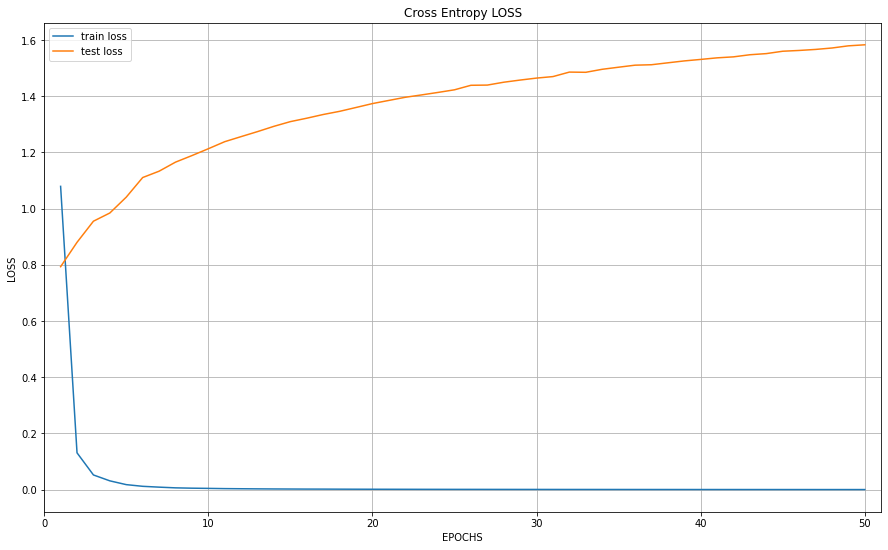

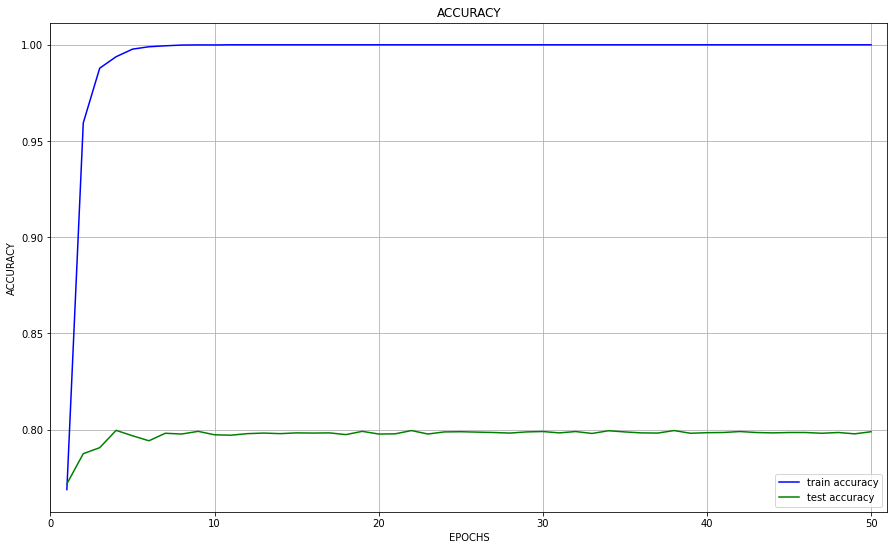

In [ ]:
loss=history_S_6.history['loss']
val_loss=history_S_6.history['val_loss']
acc=history_S_6.history['accuracy']
val_acc=history_S_6.history['val_accuracy']
EPOCH= range(1,Epoch + 1)

plt.gcf().set_size_inches(15,9,forward=True)
plt.plot(EPOCH,loss)
plt.plot(EPOCH,val_loss)
plt.title('Cross Entropy LOSS')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.grid()
plt.xlim([0,Epoch + 1])
plt.legend(['train loss','test loss'])
plt.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW3/Pic/S6los_b.jpg')
plt.show()
print(3*'\n')
print(3*'\n')
plt.gcf().set_size_inches(15,9,forward=True)
plt.plot(EPOCH,acc,color='b')
plt.plot(EPOCH,val_acc,color='g')
plt.title('ACCURACY')
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.grid()
plt.xlim([0,Epoch + 1])
plt.legend(['train accuracy','test accuracy'])
plt.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW3/Pic/S6ac_b.jpg')
plt.show()

In [ ]:
L_6= Sequential()
#L1:
L_6.add(Conv2D(filters = 64, kernel_size = 3, strides=(1, 1), padding="same", activation='relu',input_shape=(32, 32, 3)))
L_6.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
#L2:
L_6.add(Conv2D(filters = 128, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
L_6.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
#L3:
L_6.add(Conv2D(filters = 256, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))

#L4:
L_6.add(Conv2D(filters = 256, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
L_6.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#L5:
L_6.add(Conv2D(filters = 512, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))

#L6:
L_6.add(Conv2D(filters = 512, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
L_6.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

L_6.add(Flatten())

# set weights:

w1 = S_6.layers[0].get_weights()[0]
b1 = S_6.layers[0].get_weights()[1]
w2 = S_6.layers[2].get_weights()[0]
b2 = S_6.layers[2].get_weights()[1]
w3 = S_6.layers[4].get_weights()[0]
b3 = S_6.layers[4].get_weights()[1]
w4 = S_6.layers[5].get_weights()[0]
b4 = S_6.layers[5].get_weights()[1]
w5 = S_6.layers[7].get_weights()[0]
b5 = S_6.layers[7].get_weights()[1]
w6 = S_6.layers[8].get_weights()[0]
b6 = S_6.layers[8].get_weights()[1]
L_6.layers[0].set_weights([w1,b1])
L_6.layers[2].set_weights([w2,b2])
L_6.layers[4].set_weights([w3,b3])
L_6.layers[5].set_weights([w4,b4])
L_6.layers[7].set_weights([w5,b5])
L_6.layers[8].set_weights([w6,b6])

Embeding Space:

In [ ]:
emb_6 = L_6(X_subset_n)

Calculation of SI:

In [ ]:
SI(emb_6,y_subset)

0.65

### Stage 7:

Define Model For Learning:

In [ ]:
S_7= Sequential()
#L1:
S_7.add(Conv2D(filters = 64, kernel_size = 3, strides=(1, 1), padding="same", activation='relu',input_shape=(32, 32, 3)))
S_7.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#L2:
S_7.add(Conv2D(filters = 128, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
S_7.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#L3:
S_7.add(Conv2D(filters = 256, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))

#L4:
S_7.add(Conv2D(filters = 256, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
S_7.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#L5:
S_7.add(Conv2D(filters = 512, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))

#L6:
S_7.add(Conv2D(filters = 512, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
S_7.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#L7:
S_7.add(Conv2D(filters = 512, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))


#FC:
S_7.add(Flatten())
S_7.add(Dense(10))
S_7.add(Softmax(axis=1))

#Freezing:
w6 = S_6.layers[8].get_weights()[0]
b6 = S_6.layers[8].get_weights()[1]
w5 = S_6.layers[7].get_weights()[0]
b5 = S_6.layers[7].get_weights()[1]
w4 = S_6.layers[5].get_weights()[0]
b4 = S_6.layers[5].get_weights()[1]
w3 = S_6.layers[4].get_weights()[0]
b3 = S_6.layers[4].get_weights()[1]
w2 = S_6.layers[2].get_weights()[0]
b2 = S_6.layers[2].get_weights()[1]
w1 = S_6.layers[0].get_weights()[0]
b1 = S_6.layers[0].get_weights()[1]
S_7.layers[0].set_weights([w1,b1])
S_7.layers[2].set_weights([w2,b2])
S_7.layers[4].set_weights([w3,b3])
S_7.layers[5].set_weights([w4,b4])
S_7.layers[7].set_weights([w5,b5])
S_7.layers[8].set_weights([w6,b6])

S_7.layers[0].trainable = False
S_7.layers[2].trainable = False
S_7.layers[4].trainable = False
S_7.layers[5].trainable = False
S_7.layers[7].trainable = False
S_7.layers[8].trainable = False

sgd = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
S_7.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
S_7.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_45 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (None, 8, 8, 256)         295168    
                                                                 
 conv2d_47 (Conv2D)          (None, 8, 8, 256)        

In [ ]:
Epoch =  50
history_S_7=S_7.fit(x=x_train_n,y=y_train_code, batch_size=256 , epochs=Epoch,validation_data=(x_test_n,y_test_code))

Epoch 1/50
196/196 [==============================] - 7s 29ms/step - loss: 0.4213 - accuracy: 0.9199 - val_loss: 0.9441 - val_accuracy: 0.7955
Epoch 2/50
196/196 [==============================] - 5s 23ms/step - loss: 0.0141 - accuracy: 0.9992 - val_loss: 1.0668 - val_accuracy: 0.8009
Epoch 3/50
196/196 [==============================] - 4s 23ms/step - loss: 0.0072 - accuracy: 0.9999 - val_loss: 1.1563 - val_accuracy: 0.7974
Epoch 4/50
196/196 [==============================] - 5s 25ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 1.2102 - val_accuracy: 0.8000
Epoch 5/50
196/196 [==============================] - 5s 26ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 1.2588 - val_accuracy: 0.7987
Epoch 6/50
196/196 [==============================] - 5s 24ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 1.3023 - val_accuracy: 0.7994
Epoch 7/50
196/196 [==============================] - 5s 25ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 1.3394 - val_accuracy: 0.7991

In [ ]:
S_7.save('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW3/Model/B/S_7.h5')

Plot Loss And Accuracy:

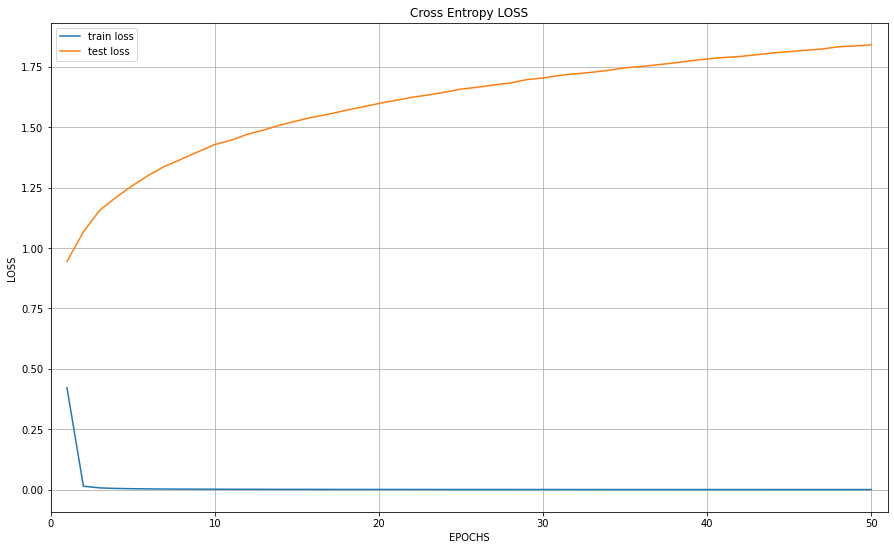

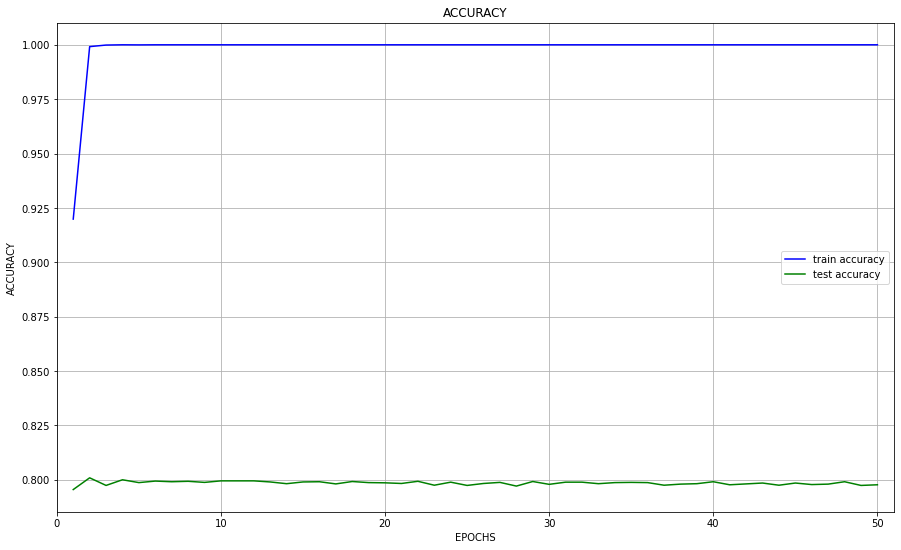

In [ ]:
loss=history_S_7.history['loss']
val_loss=history_S_7.history['val_loss']
acc=history_S_7.history['accuracy']
val_acc=history_S_7.history['val_accuracy']
EPOCH= range(1,Epoch + 1)

plt.gcf().set_size_inches(15,9,forward=True)
plt.plot(EPOCH,loss)
plt.plot(EPOCH,val_loss)
plt.title('Cross Entropy LOSS')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.grid()
plt.xlim([0,Epoch + 1])
plt.legend(['train loss','test loss'])
plt.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW3/Pic/S7los_b.jpg')
plt.show()
print(3*'\n')
print(3*'\n')
plt.gcf().set_size_inches(15,9,forward=True)
plt.plot(EPOCH,acc,color='b')
plt.plot(EPOCH,val_acc,color='g')
plt.title('ACCURACY')
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.grid()
plt.xlim([0,Epoch + 1])
plt.legend(['train accuracy','test accuracy'])
plt.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW3/Pic/S7ac_b.jpg')
plt.show()

In [ ]:
L_7= Sequential()
#L1:
L_7.add(Conv2D(filters = 64, kernel_size = 3, strides=(1, 1), padding="same", activation='relu',input_shape=(32, 32, 3)))
L_7.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
#L2:
L_7.add(Conv2D(filters = 128, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
L_7.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
#L3:
L_7.add(Conv2D(filters = 256, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))

#L4:
L_7.add(Conv2D(filters = 256, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
L_7.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#L5:
L_7.add(Conv2D(filters = 512, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))

#L6:
L_7.add(Conv2D(filters = 512, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
L_7.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#L7:
L_7.add(Conv2D(filters = 512, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))

L_7.add(Flatten())

# set weights:

w1 = S_7.layers[0].get_weights()[0]
b1 = S_7.layers[0].get_weights()[1]
w2 = S_7.layers[2].get_weights()[0]
b2 = S_7.layers[2].get_weights()[1]
w3 = S_7.layers[4].get_weights()[0]
b3 = S_7.layers[4].get_weights()[1]
w4 = S_7.layers[5].get_weights()[0]
b4 = S_7.layers[5].get_weights()[1]
w5 = S_7.layers[7].get_weights()[0]
b5 = S_7.layers[7].get_weights()[1]
w6 = S_7.layers[8].get_weights()[0]
b6 = S_7.layers[8].get_weights()[1]
w7 = S_7.layers[10].get_weights()[0]
b7 = S_7.layers[10].get_weights()[1]
L_7.layers[0].set_weights([w1,b1])
L_7.layers[2].set_weights([w2,b2])
L_7.layers[4].set_weights([w3,b3])
L_7.layers[5].set_weights([w4,b4])
L_7.layers[7].set_weights([w5,b5])
L_7.layers[8].set_weights([w6,b6])
L_7.layers[10].set_weights([w7,b7])

Embeding Space:

In [ ]:
emb_7 = L_7(X_subset_n)

Calculation of SI:

In [ ]:
SI(emb_7,y_subset)

0.674

### Stage 8:

Define Model For Learning:

In [ ]:
S_8= Sequential()
#L1:
S_8.add(Conv2D(filters = 64, kernel_size = 3, strides=(1, 1), padding="same", activation='relu',input_shape=(32, 32, 3)))
S_8.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#L2:
S_8.add(Conv2D(filters = 128, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
S_8.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#L3:
S_8.add(Conv2D(filters = 256, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))

#L4:
S_8.add(Conv2D(filters = 256, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
S_8.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#L5:
S_8.add(Conv2D(filters = 512, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))

#L6:
S_8.add(Conv2D(filters = 512, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
S_8.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#L7:
S_8.add(Conv2D(filters = 512, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))

#L8:
S_8.add(Conv2D(filters = 512, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
S_8.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))


#FC:
S_8.add(Flatten())
S_8.add(Dense(10))
S_8.add(Softmax(axis=1))

#Freezing:
w7 = S_7.layers[10].get_weights()[0]
b7 = S_7.layers[10].get_weights()[1]
w6 = S_7.layers[8].get_weights()[0]
b6 = S_7.layers[8].get_weights()[1]
w5 = S_7.layers[7].get_weights()[0]
b5 = S_7.layers[7].get_weights()[1]
w4 = S_7.layers[5].get_weights()[0]
b4 = S_7.layers[5].get_weights()[1]
w3 = S_7.layers[4].get_weights()[0]
b3 = S_7.layers[4].get_weights()[1]
w2 = S_7.layers[2].get_weights()[0]
b2 = S_7.layers[2].get_weights()[1]
w1 = S_7.layers[0].get_weights()[0]
b1 = S_7.layers[0].get_weights()[1]
S_8.layers[0].set_weights([w1,b1])
S_8.layers[2].set_weights([w2,b2])
S_8.layers[4].set_weights([w3,b3])
S_8.layers[5].set_weights([w4,b4])
S_8.layers[7].set_weights([w5,b5])
S_8.layers[8].set_weights([w6,b6])
S_8.layers[10].set_weights([w7,b7])

S_8.layers[0].trainable = False
S_8.layers[2].trainable = False
S_8.layers[4].trainable = False
S_8.layers[5].trainable = False
S_8.layers[7].trainable = False
S_8.layers[8].trainable = False
S_8.layers[10].trainable = False

sgd = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
S_8.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
S_8.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_65 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_66 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_67 (Conv2D)          (None, 8, 8, 256)         295168    
                                                                 
 conv2d_68 (Conv2D)          (None, 8, 8, 256)       

In [ ]:
Epoch =  50
history_S_8=S_8.fit(x=x_train_n,y=y_train_code, batch_size=256 , epochs=Epoch,validation_data=(x_test_n,y_test_code))

Epoch 1/50
196/196 [==============================] - 6s 27ms/step - loss: 0.3252 - accuracy: 0.9501 - val_loss: 1.3499 - val_accuracy: 0.7987
Epoch 2/50
196/196 [==============================] - 6s 28ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 1.4512 - val_accuracy: 0.7973
Epoch 3/50
196/196 [==============================] - 6s 28ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 1.5074 - val_accuracy: 0.7985
Epoch 4/50
196/196 [==============================] - 6s 31ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.5632 - val_accuracy: 0.7981
Epoch 5/50
196/196 [==============================] - 5s 28ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 1.5984 - val_accuracy: 0.7987
Epoch 6/50
196/196 [==============================] - 6s 28ms/step - loss: 8.5565e-04 - accuracy: 1.0000 - val_loss: 1.6356 - val_accuracy: 0.7984
Epoch 7/50
196/196 [==============================] - 5s 27ms/step - loss: 7.4390e-04 - accuracy: 1.0000 - val_loss: 1.6649 - val_accuracy

In [ ]:
S_8.save('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW3/Model/B/S_8.h5')

Plot Loss And Accuracy:

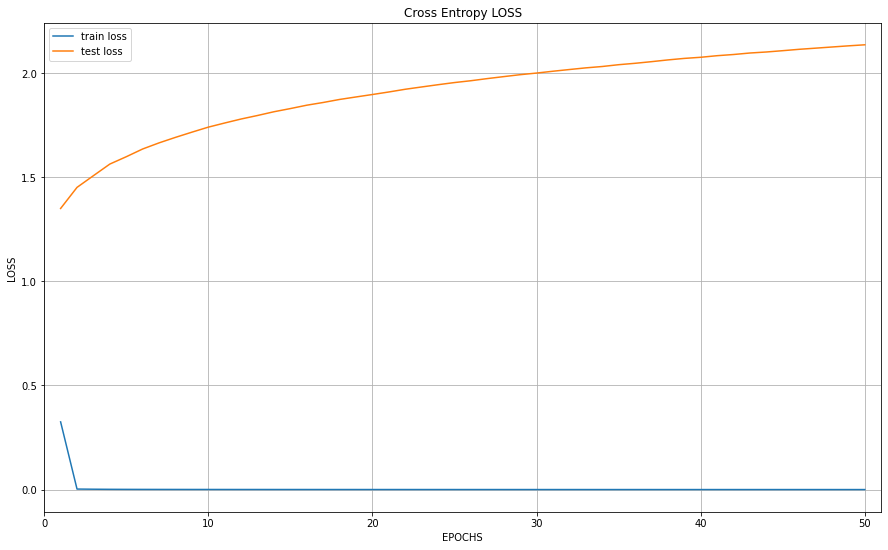

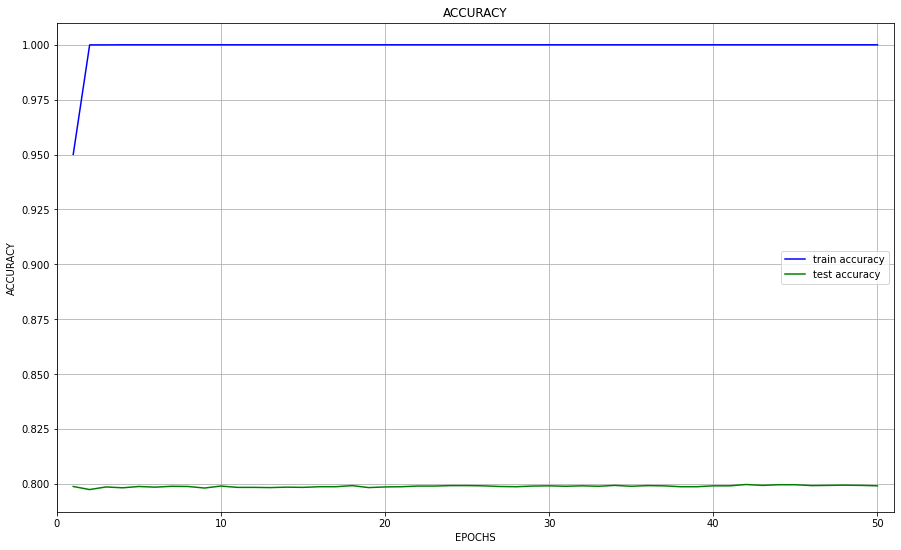

In [ ]:
loss=history_S_8.history['loss']
val_loss=history_S_8.history['val_loss']
acc=history_S_8.history['accuracy']
val_acc=history_S_8.history['val_accuracy']
EPOCH= range(1,Epoch + 1)

plt.gcf().set_size_inches(15,9,forward=True)
plt.plot(EPOCH,loss)
plt.plot(EPOCH,val_loss)
plt.title('Cross Entropy LOSS')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.grid()
plt.xlim([0,Epoch + 1])
plt.legend(['train loss','test loss'])
plt.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW3/Pic/S8los_b.jpg')
plt.show()
print(3*'\n')
print(3*'\n')
plt.gcf().set_size_inches(15,9,forward=True)
plt.plot(EPOCH,acc,color='b')
plt.plot(EPOCH,val_acc,color='g')
plt.title('ACCURACY')
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.grid()
plt.xlim([0,Epoch + 1])
plt.legend(['train accuracy','test accuracy'])
plt.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW3/Pic/S8ac_b.jpg')
plt.show()

In [ ]:
L_8= Sequential()
#L1:
L_8.add(Conv2D(filters = 64, kernel_size = 3, strides=(1, 1), padding="same", activation='relu',input_shape=(32, 32, 3)))
L_8.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
#L2:
L_8.add(Conv2D(filters = 128, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
L_8.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
#L3:
L_8.add(Conv2D(filters = 256, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))

#L4:
L_8.add(Conv2D(filters = 256, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
L_8.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#L5:
L_8.add(Conv2D(filters = 512, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))

#L6:
L_8.add(Conv2D(filters = 512, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
L_8.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#L7:
L_8.add(Conv2D(filters = 512, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))

#L8:
L_8.add(Conv2D(filters = 512, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
L_8.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

L_8.add(Flatten())

# set weights:

w1 = S_8.layers[0].get_weights()[0]
b1 = S_8.layers[0].get_weights()[1]
w2 = S_8.layers[2].get_weights()[0]
b2 = S_8.layers[2].get_weights()[1]
w3 = S_8.layers[4].get_weights()[0]
b3 = S_8.layers[4].get_weights()[1]
w4 = S_8.layers[5].get_weights()[0]
b4 = S_8.layers[5].get_weights()[1]
w5 = S_8.layers[7].get_weights()[0]
b5 = S_8.layers[7].get_weights()[1]
w6 = S_8.layers[8].get_weights()[0]
b6 = S_8.layers[8].get_weights()[1]
w7 = S_8.layers[10].get_weights()[0]
b7 = S_8.layers[10].get_weights()[1]
w8 = S_8.layers[11].get_weights()[0]
b8 = S_8.layers[11].get_weights()[1]
L_8.layers[0].set_weights([w1,b1])
L_8.layers[2].set_weights([w2,b2])
L_8.layers[4].set_weights([w3,b3])
L_8.layers[5].set_weights([w4,b4])
L_8.layers[7].set_weights([w5,b5])
L_8.layers[8].set_weights([w6,b6])
L_8.layers[10].set_weights([w7,b7])
L_8.layers[11].set_weights([w8,b8])

Embeding Space:

In [ ]:
emb_8 = L_8(X_subset_n)

Calculation of SI:

In [ ]:

SI(emb_8,y_subset)

0.701

### Fine Tune With Fully Connected:

Define Model For Learning:

In [ ]:
S_8 = load_model('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW3/Model/B/S_8.h5')
S_7 = load_model('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW3/Model/B/S_7.h5')

In [ ]:
S_f= Sequential()
#L1:
S_f.add(Conv2D(filters = 64, kernel_size = 3, strides=(1, 1), padding="same", activation='relu',input_shape=(32, 32, 3)))
S_f.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#L2:
S_f.add(Conv2D(filters = 128, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
S_f.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#L3:
S_f.add(Conv2D(filters = 256, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))

#L4:
S_f.add(Conv2D(filters = 256, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
S_f.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#L5:
S_f.add(Conv2D(filters = 512, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))

#L6:
S_f.add(Conv2D(filters = 512, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
S_f.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#L7:
S_f.add(Conv2D(filters = 512, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))

#L8:
S_f.add(Conv2D(filters = 512, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
S_f.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))


#FC:
S_f.add(Flatten())
S_f.add(Dense(4096, activation='relu'))
S_f.add(Dense(4096, activation='relu'))
S_f.add(Dense(10))
S_f.add(Softmax(axis=1))

#Freezing:
w8 = S_8.layers[11].get_weights()[0]
b8 = S_8.layers[11].get_weights()[1]
w7 = S_8.layers[10].get_weights()[0]
b7 = S_8.layers[10].get_weights()[1]
w6 = S_8.layers[8].get_weights()[0]
b6 = S_8.layers[8].get_weights()[1]
w5 = S_8.layers[7].get_weights()[0]
b5 = S_8.layers[7].get_weights()[1]
w4 = S_8.layers[5].get_weights()[0]
b4 = S_8.layers[5].get_weights()[1]
w3 = S_8.layers[4].get_weights()[0]
b3 = S_8.layers[4].get_weights()[1]
w2 = S_8.layers[2].get_weights()[0]
b2 = S_8.layers[2].get_weights()[1]
w1 = S_8.layers[0].get_weights()[0]
b1 = S_8.layers[0].get_weights()[1]
S_f.layers[0].set_weights([w1,b1])
S_f.layers[2].set_weights([w2,b2])
S_f.layers[4].set_weights([w3,b3])
S_f.layers[5].set_weights([w4,b4])
S_f.layers[7].set_weights([w5,b5])
S_f.layers[8].set_weights([w6,b6])
S_f.layers[10].set_weights([w7,b7])
S_f.layers[11].set_weights([w8,b8])

S_f.layers[0].trainable = False
S_f.layers[2].trainable = False
S_f.layers[4].trainable = False
S_f.layers[5].trainable = False
S_f.layers[7].trainable = False
S_f.layers[8].trainable = False
S_f.layers[10].trainable = False
S_f.layers[11].trainable = False

sgd = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
S_f.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
S_f.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_89 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_59 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_90 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_60 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_91 (Conv2D)          (None, 8, 8, 256)         295168    
                                                                 
 conv2d_92 (Conv2D)          (None, 8, 8, 256)       

In [ ]:
Epoch =  50
history_S_f=S_f.fit(x=x_train_n,y=y_train_code, batch_size=256 , epochs=Epoch,validation_data=(x_test_n,y_test_code))

Epoch 1/50
196/196 [==============================] - 8s 37ms/step - loss: 0.0642 - accuracy: 0.9798 - val_loss: 1.6516 - val_accuracy: 0.7988
Epoch 2/50
196/196 [==============================] - 7s 35ms/step - loss: 6.9083e-04 - accuracy: 1.0000 - val_loss: 1.7324 - val_accuracy: 0.8000
Epoch 3/50
196/196 [==============================] - 7s 35ms/step - loss: 4.9162e-04 - accuracy: 1.0000 - val_loss: 1.7936 - val_accuracy: 0.7994
Epoch 4/50
196/196 [==============================] - 7s 34ms/step - loss: 3.8883e-04 - accuracy: 1.0000 - val_loss: 1.8434 - val_accuracy: 0.7996
Epoch 5/50
196/196 [==============================] - 7s 34ms/step - loss: 3.2293e-04 - accuracy: 1.0000 - val_loss: 1.8859 - val_accuracy: 0.7997
Epoch 6/50
196/196 [==============================] - 7s 34ms/step - loss: 2.7939e-04 - accuracy: 1.0000 - val_loss: 1.9221 - val_accuracy: 0.7989
Epoch 7/50
196/196 [==============================] - 7s 33ms/step - loss: 2.4431e-04 - accuracy: 1.0000 - val_loss: 1.954

In [ ]:
S_f.save('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW3/Model/B/S_f.h5')

Plot Loss And Accuracy:

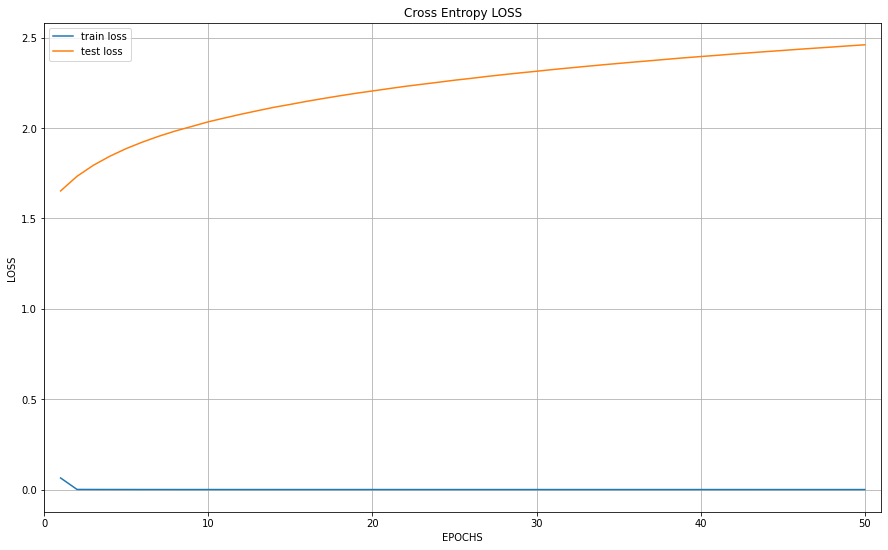

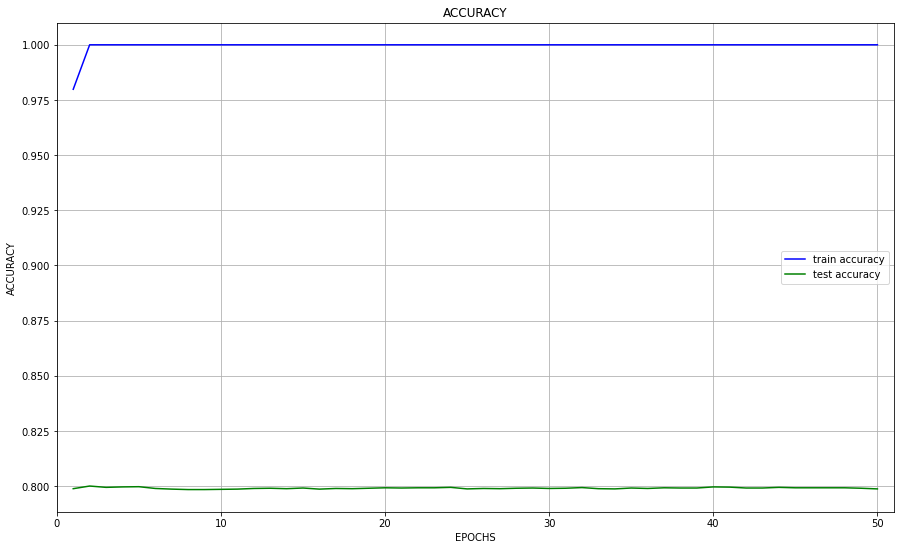

In [ ]:
loss=history_S_f.history['loss']
val_loss=history_S_f.history['val_loss']
acc=history_S_f.history['accuracy']
val_acc=history_S_f.history['val_accuracy']
EPOCH= range(1,Epoch + 1)

plt.gcf().set_size_inches(15,9,forward=True)
plt.plot(EPOCH,loss)
plt.plot(EPOCH,val_loss)
plt.title('Cross Entropy LOSS')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.grid()
plt.xlim([0,Epoch + 1])
plt.legend(['train loss','test loss'])
plt.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW3/Pic/Sflos_b.jpg')
plt.show()
print(3*'\n')
print(3*'\n')
plt.gcf().set_size_inches(15,9,forward=True)
plt.plot(EPOCH,acc,color='b')
plt.plot(EPOCH,val_acc,color='g')
plt.title('ACCURACY')
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.grid()
plt.xlim([0,Epoch + 1])
plt.legend(['train accuracy','test accuracy'])
plt.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW3/Pic/Sfac_b.jpg')
plt.show()

Embeding Space:

In [ ]:
embed_model_f1 = Model(inputs = S_f.input, outputs = S_f.layers[14].output)
emb_9 = embed_model_f1(X_subset_n)
embed_model_f2 = Model(inputs = S_f.input, outputs = S_f.layers[15].output)
emb_10 = embed_model_f2(X_subset_n)
embed_model_f3 = Model(inputs = S_f.input, outputs = S_f.layers[16].output)
emb_11 = embed_model_f3(X_subset_n)

Calculation of SI:

Layer #9:

In [ ]:
SI(emb_9,y_subset)

0.696

Layer #10:

In [ ]:
SI(emb_10,y_subset)

0.7

Layer #11:

In [ ]:
SI(emb_11,y_subset)

0.711

Plot SI vs Layers:

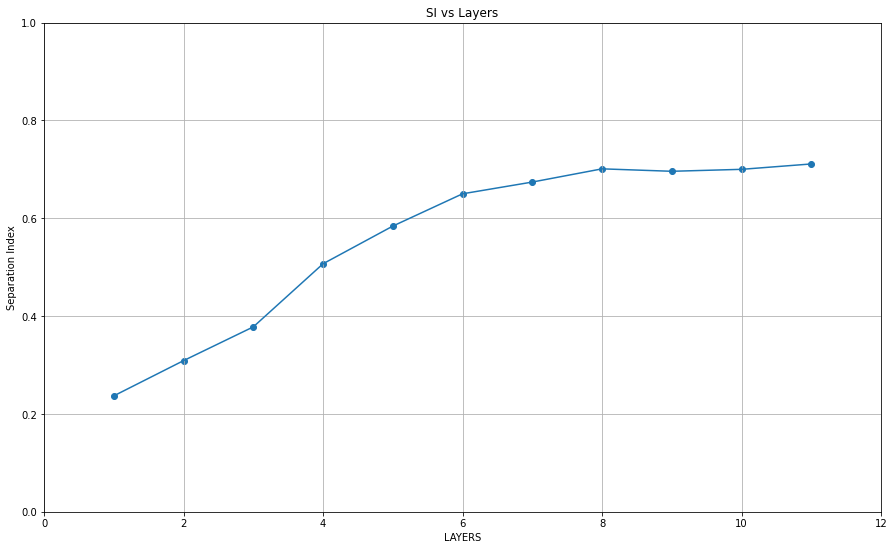

In [ ]:
SI_list=[0.237,0.309,0.378,0.507,0.584,0.65,0.674,0.701,0.696,0.7,0.711]
layer= range(1,12)
plt.gcf().set_size_inches(15,9,forward=True)
plt.plot(layer,SI_list)
plt.scatter(layer,SI_list)
plt.title('SI vs Layers')
plt.xlabel('LAYERS')
plt.ylabel('Separation Index')
plt.grid()
plt.xlim([0,12])
plt.ylim([0,1])
plt.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW3/Pic/SI_b.jpg')
plt.show()

Part C: Layer-wise training without freezing layer:

### Stage 1:

Define Model For Learning:

In [ ]:
S_1= Sequential()
#L1:
S_1.add(Conv2D(filters = 64, kernel_size = 3, strides=(1, 1), padding="same", activation='relu',input_shape=(32, 32, 3)))
S_1.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#FC:
S_1.add(Flatten())
S_1.add(Dense(10))
S_1.add(Softmax(axis=1))

sgd = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
S_1.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
S_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 16384)             0         
                                                                 
 dense (Dense)               (None, 10)                163850    
                                                                 
 softmax (Softmax)           (None, 10)                0         
                                                                 
Total params: 165,642
Trainable params: 165,642
Non-trainable params: 0
__________________________________________________

Training:

In [ ]:
Epoch =  50
history_S_1=S_1.fit(x=x_train_n,y=y_train_code, batch_size=256 , epochs=Epoch,validation_data=(x_test_n,y_test_code))

Epoch 1/50
196/196 [==============================] - 9s 12ms/step - loss: 1.8930 - accuracy: 0.3334 - val_loss: 1.6902 - val_accuracy: 0.4148
Epoch 2/50
196/196 [==============================] - 2s 11ms/step - loss: 1.5679 - accuracy: 0.4575 - val_loss: 1.4224 - val_accuracy: 0.5024
Epoch 3/50
196/196 [==============================] - 2s 10ms/step - loss: 1.3807 - accuracy: 0.5207 - val_loss: 1.3274 - val_accuracy: 0.5319
Epoch 4/50
196/196 [==============================] - 2s 10ms/step - loss: 1.2895 - accuracy: 0.5531 - val_loss: 1.2612 - val_accuracy: 0.5590
Epoch 5/50
196/196 [==============================] - 2s 10ms/step - loss: 1.2336 - accuracy: 0.5722 - val_loss: 1.2476 - val_accuracy: 0.5603
Epoch 6/50
196/196 [==============================] - 2s 11ms/step - loss: 1.1979 - accuracy: 0.5864 - val_loss: 1.2551 - val_accuracy: 0.5483
Epoch 7/50
196/196 [==============================] - 2s 10ms/step - loss: 1.1566 - accuracy: 0.6000 - val_loss: 1.1969 - val_accuracy: 0.5869

In [ ]:
S_1.save('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW3/Model/C/S_1.h5')

Plot Loss And Accuracy:

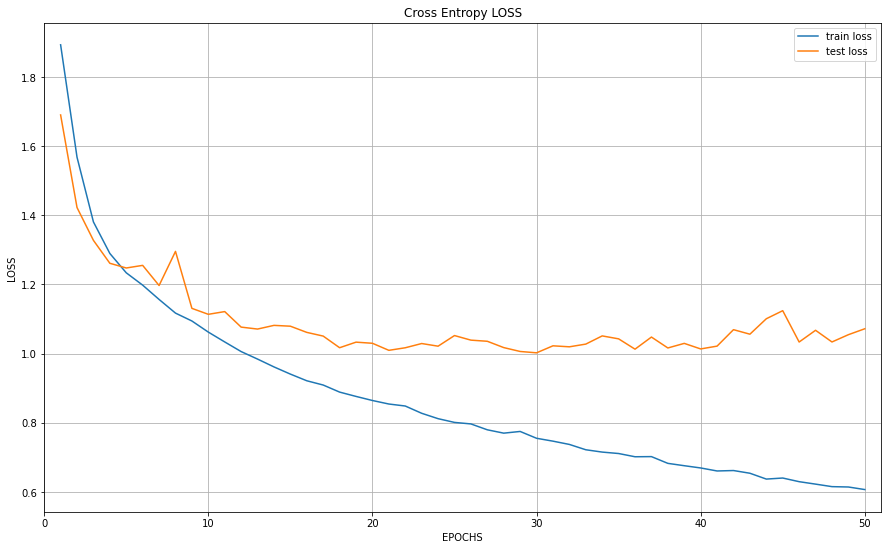

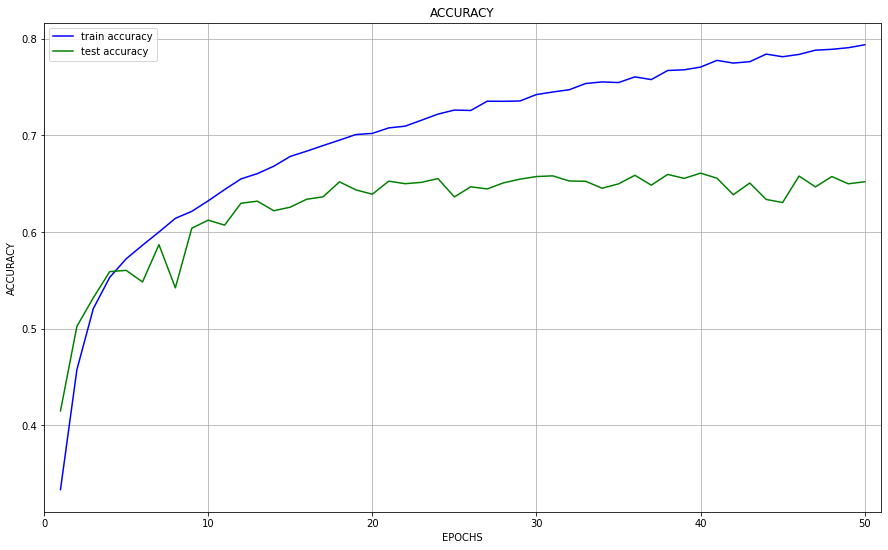

In [ ]:
loss=history_S_1.history['loss']
val_loss=history_S_1.history['val_loss']
acc=history_S_1.history['accuracy']
val_acc=history_S_1.history['val_accuracy']
EPOCH= range(1,Epoch + 1)

plt.gcf().set_size_inches(15,9,forward=True)
plt.plot(EPOCH,loss)
plt.plot(EPOCH,val_loss)
plt.title('Cross Entropy LOSS')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.grid()
plt.xlim([0,Epoch + 1])
plt.legend(['train loss','test loss'])
plt.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW3/Pic/S1los_c.jpg')
plt.show()
print(3*'\n')
print(3*'\n')
plt.gcf().set_size_inches(15,9,forward=True)
plt.plot(EPOCH,acc,color='b')
plt.plot(EPOCH,val_acc,color='g')
plt.title('ACCURACY')
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.grid()
plt.xlim([0,Epoch + 1])
plt.legend(['train accuracy','test accuracy'])
plt.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW3/Pic/S1ac_c.jpg')
plt.show()

Define Model For SI Calculation:

In [ ]:
L_1= Sequential()
#L1:
L_1.add(Conv2D(filters = 64, kernel_size = 3, strides=(1, 1), padding="same", activation='relu',input_shape=(32, 32, 3)))
L_1.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
L_1.add(Flatten())

# set weights:

w1 = S_1.layers[0].get_weights()[0]
b1 = S_1.layers[0].get_weights()[1]
L_1.layers[0].set_weights([w1,b1])


Embeding Space:

In [ ]:
emb_1 = L_1(X_subset_n)

Calculation of SI:

In [ ]:
SI(emb_1,y_subset)

0.236

### Stage 2:

Define Model For Learning:

In [ ]:
S_2= Sequential()
#L1:
S_2.add(Conv2D(filters = 64, kernel_size = 3, strides=(1, 1), padding="same", activation='relu',input_shape=(32, 32, 3)))
S_2.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#L2:
S_2.add(Conv2D(filters = 128, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
S_2.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#FC:
S_2.add(Flatten())
S_2.add(Dense(10))
S_2.add(Softmax(axis=1))

#Freezing:
w1 = S_1.layers[0].get_weights()[0]
b1 = S_1.layers[0].get_weights()[1]
S_2.layers[0].set_weights([w1,b1])



sgd = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
S_2.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
S_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [ ]:
Epoch =  50
history_S_2=S_2.fit(x=x_train_n,y=y_train_code, batch_size=256 , epochs=Epoch,validation_data=(x_test_n,y_test_code))

Epoch 1/50
196/196 [==============================] - 4s 18ms/step - loss: 1.3698 - accuracy: 0.5210 - val_loss: 1.1137 - val_accuracy: 0.6108
Epoch 2/50
196/196 [==============================] - 3s 17ms/step - loss: 1.0032 - accuracy: 0.6538 - val_loss: 0.9996 - val_accuracy: 0.6497
Epoch 3/50
196/196 [==============================] - 3s 17ms/step - loss: 0.9010 - accuracy: 0.6916 - val_loss: 0.9345 - val_accuracy: 0.6793
Epoch 4/50
196/196 [==============================] - 3s 17ms/step - loss: 0.8429 - accuracy: 0.7123 - val_loss: 0.9395 - val_accuracy: 0.6735
Epoch 5/50
196/196 [==============================] - 3s 17ms/step - loss: 0.7894 - accuracy: 0.7304 - val_loss: 0.9005 - val_accuracy: 0.6865
Epoch 6/50
196/196 [==============================] - 3s 17ms/step - loss: 0.7412 - accuracy: 0.7477 - val_loss: 0.8363 - val_accuracy: 0.7140
Epoch 7/50
196/196 [==============================] - 3s 17ms/step - loss: 0.6981 - accuracy: 0.7634 - val_loss: 0.8138 - val_accuracy: 0.7233

In [ ]:
S_2.save('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW3/Model/C/S_2.h5')

Plot Loss And Accuracy:

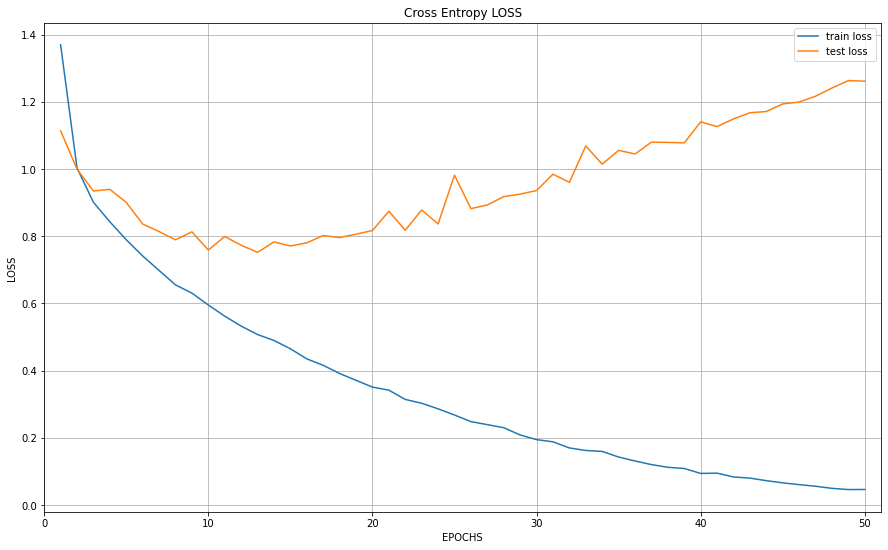

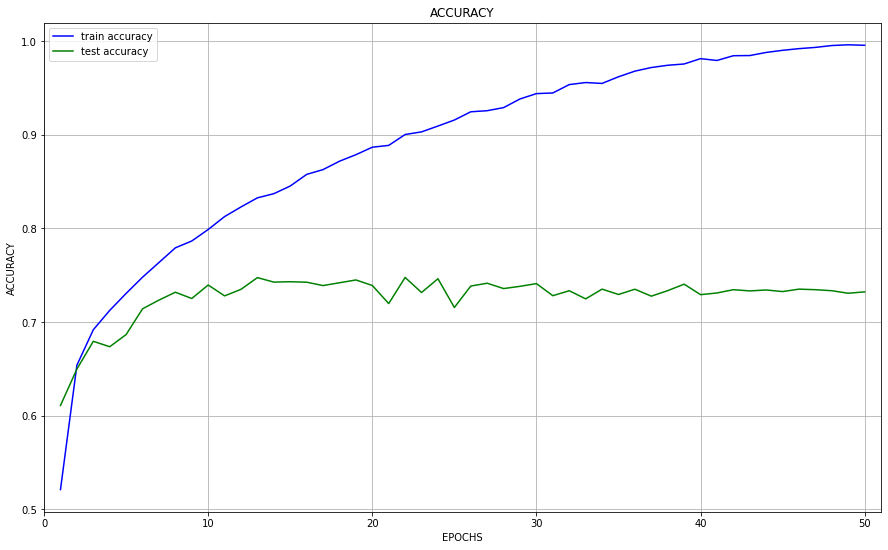

In [ ]:
loss=history_S_2.history['loss']
val_loss=history_S_2.history['val_loss']
acc=history_S_2.history['accuracy']
val_acc=history_S_2.history['val_accuracy']
EPOCH= range(1,Epoch + 1)

plt.gcf().set_size_inches(15,9,forward=True)
plt.plot(EPOCH,loss)
plt.plot(EPOCH,val_loss)
plt.title('Cross Entropy LOSS')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.grid()
plt.xlim([0,Epoch + 1])
plt.legend(['train loss','test loss'])
plt.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW3/Pic/S2los_c.jpg')
plt.show()
print(3*'\n')
print(3*'\n')
plt.gcf().set_size_inches(15,9,forward=True)
plt.plot(EPOCH,acc,color='b')
plt.plot(EPOCH,val_acc,color='g')
plt.title('ACCURACY')
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.grid()
plt.xlim([0,Epoch + 1])
plt.legend(['train accuracy','test accuracy'])
plt.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW3/Pic/S2ac_c.jpg')
plt.show()

In [ ]:
L_2= Sequential()
#L1:
L_2.add(Conv2D(filters = 64, kernel_size = 3, strides=(1, 1), padding="same", activation='relu',input_shape=(32, 32, 3)))
L_2.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
#L2:
L_2.add(Conv2D(filters = 128, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
L_2.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

L_2.add(Flatten())

# set weights:

w1 = S_2.layers[0].get_weights()[0]
b1 = S_2.layers[0].get_weights()[1]
w2 = S_2.layers[2].get_weights()[0]
b2 = S_2.layers[2].get_weights()[1]
L_2.layers[0].set_weights([w1,b1])
L_2.layers[2].set_weights([w2,b2])



Embeding Space:

In [ ]:
emb_2 = L_2(X_subset_n)

Calculation of SI:

In [ ]:
SI(emb_2,y_subset)

0.295

### Stage 3:

Define Model For Learning:

In [ ]:
S_3= Sequential()
#L1:
S_3.add(Conv2D(filters = 64, kernel_size = 3, strides=(1, 1), padding="same", activation='relu',input_shape=(32, 32, 3)))
S_3.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#L2:
S_3.add(Conv2D(filters = 128, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
S_3.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#L3:
S_3.add(Conv2D(filters = 256, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))

#FC:
S_3.add(Flatten())
S_3.add(Dense(10))
S_3.add(Softmax(axis=1))

#Freezing:
w2 = S_2.layers[2].get_weights()[0]
b2 = S_2.layers[2].get_weights()[1]
w1 = S_2.layers[0].get_weights()[0]
b1 = S_2.layers[0].get_weights()[1]
S_3.layers[0].set_weights([w1,b1])
S_3.layers[2].set_weights([w2,b2])



sgd = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
S_3.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
S_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 256)         295168    
                                                                 
 flatten_5 (Flatten)         (None, 16384)            

In [ ]:
Epoch =  50
history_S_3=S_3.fit(x=x_train_n,y=y_train_code, batch_size=256 , epochs=Epoch,validation_data=(x_test_n,y_test_code))

Epoch 1/50
196/196 [==============================] - 6s 25ms/step - loss: 0.9827 - accuracy: 0.6606 - val_loss: 0.7921 - val_accuracy: 0.7290
Epoch 2/50
196/196 [==============================] - 4s 22ms/step - loss: 0.6105 - accuracy: 0.7900 - val_loss: 0.7904 - val_accuracy: 0.7403
Epoch 3/50
196/196 [==============================] - 5s 27ms/step - loss: 0.4799 - accuracy: 0.8357 - val_loss: 0.6664 - val_accuracy: 0.7754
Epoch 4/50
196/196 [==============================] - 5s 27ms/step - loss: 0.3762 - accuracy: 0.8738 - val_loss: 0.7014 - val_accuracy: 0.7714
Epoch 5/50
196/196 [==============================] - 4s 21ms/step - loss: 0.2990 - accuracy: 0.9024 - val_loss: 0.7087 - val_accuracy: 0.7773
Epoch 6/50
196/196 [==============================] - 4s 21ms/step - loss: 0.2286 - accuracy: 0.9298 - val_loss: 0.7563 - val_accuracy: 0.7624
Epoch 7/50
196/196 [==============================] - 4s 23ms/step - loss: 0.1798 - accuracy: 0.9477 - val_loss: 0.7403 - val_accuracy: 0.7786

In [ ]:
S_3.save('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW3/Model/C/S_3.h5')

Plot Loss And Accuracy:

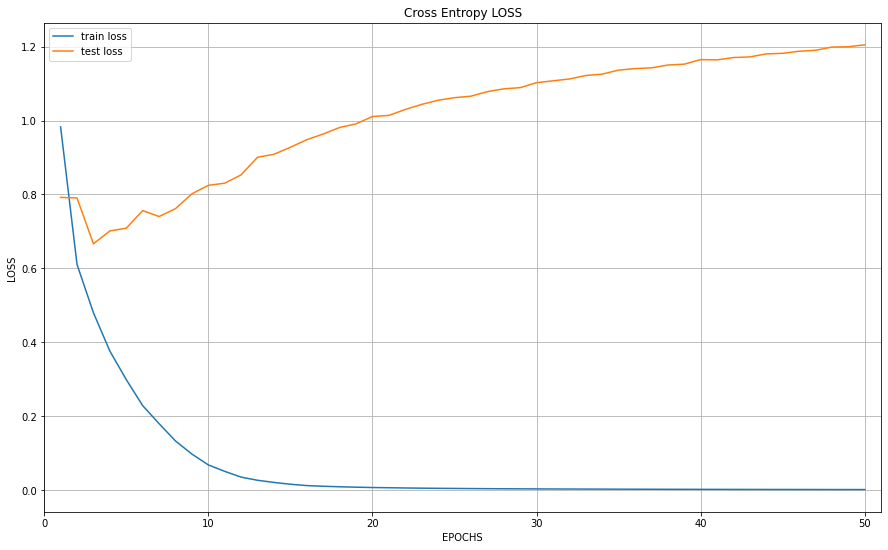

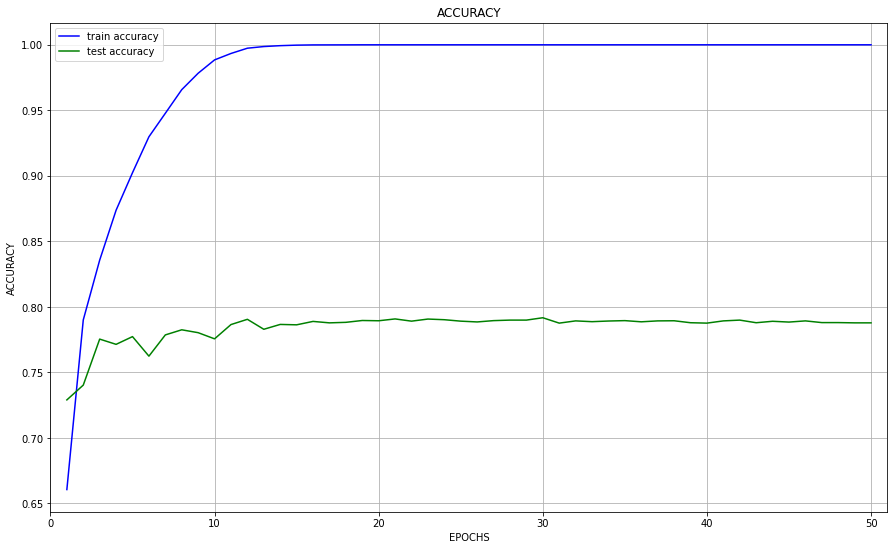

In [ ]:
loss=history_S_3.history['loss']
val_loss=history_S_3.history['val_loss']
acc=history_S_3.history['accuracy']
val_acc=history_S_3.history['val_accuracy']
EPOCH= range(1,Epoch + 1)

plt.gcf().set_size_inches(15,9,forward=True)
plt.plot(EPOCH,loss)
plt.plot(EPOCH,val_loss)
plt.title('Cross Entropy LOSS')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.grid()
plt.xlim([0,Epoch + 1])
plt.legend(['train loss','test loss'])
plt.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW3/Pic/S3los_c.jpg')
plt.show()
print(3*'\n')
print(3*'\n')
plt.gcf().set_size_inches(15,9,forward=True)
plt.plot(EPOCH,acc,color='b')
plt.plot(EPOCH,val_acc,color='g')
plt.title('ACCURACY')
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.grid()
plt.xlim([0,Epoch + 1])
plt.legend(['train accuracy','test accuracy'])
plt.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW3/Pic/S3ac_c.jpg')
plt.show()

In [ ]:
L_3= Sequential()
#L1:
L_3.add(Conv2D(filters = 64, kernel_size = 3, strides=(1, 1), padding="same", activation='relu',input_shape=(32, 32, 3)))
L_3.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
#L2:
L_3.add(Conv2D(filters = 128, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
L_3.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
#L3:
L_3.add(Conv2D(filters = 256, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))

L_3.add(Flatten())

# set weights:

w1 = S_3.layers[0].get_weights()[0]
b1 = S_3.layers[0].get_weights()[1]
w2 = S_3.layers[2].get_weights()[0]
b2 = S_3.layers[2].get_weights()[1]
w3 = S_3.layers[4].get_weights()[0]
b3 = S_3.layers[4].get_weights()[1]
L_3.layers[0].set_weights([w1,b1])
L_3.layers[2].set_weights([w2,b2])
L_3.layers[4].set_weights([w3,b3])


Embeding Space:

In [ ]:
emb_3 = L_3(X_subset_n)

Calculation of SI:

In [ ]:
SI(emb_3,y_subset)

0.36

### Stage 4:

Define Model For Learning:

In [ ]:
S_4= Sequential()
#L1:
S_4.add(Conv2D(filters = 64, kernel_size = 3, strides=(1, 1), padding="same", activation='relu',input_shape=(32, 32, 3)))
S_4.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#L2:
S_4.add(Conv2D(filters = 128, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
S_4.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#L3:
S_4.add(Conv2D(filters = 256, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))

#L4:
S_4.add(Conv2D(filters = 256, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
S_4.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))


#FC:
S_4.add(Flatten())
S_4.add(Dense(10))
S_4.add(Softmax(axis=1))

#Freezing:
w3 = S_3.layers[4].get_weights()[0]
b3 = S_3.layers[4].get_weights()[1]
w2 = S_3.layers[2].get_weights()[0]
b2 = S_3.layers[2].get_weights()[1]
w1 = S_3.layers[0].get_weights()[0]
b1 = S_3.layers[0].get_weights()[1]
S_4.layers[0].set_weights([w1,b1])
S_4.layers[2].set_weights([w2,b2])
S_4.layers[4].set_weights([w3,b3])


sgd = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
S_4.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
S_4.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 8, 8, 256)         295168    
                                                                 
 conv2d_18 (Conv2D)          (None, 8, 8, 256)        

In [ ]:
Epoch =  50
history_S_4=S_4.fit(x=x_train_n,y=y_train_code, batch_size=256 , epochs=Epoch,validation_data=(x_test_n,y_test_code))

Epoch 1/50
196/196 [==============================] - 7s 31ms/step - loss: 0.9329 - accuracy: 0.6880 - val_loss: 0.7263 - val_accuracy: 0.7496
Epoch 2/50
196/196 [==============================] - 6s 28ms/step - loss: 0.5102 - accuracy: 0.8227 - val_loss: 0.6745 - val_accuracy: 0.7691
Epoch 3/50
196/196 [==============================] - 6s 30ms/step - loss: 0.3840 - accuracy: 0.8676 - val_loss: 0.6389 - val_accuracy: 0.7843
Epoch 4/50
196/196 [==============================] - 6s 30ms/step - loss: 0.2670 - accuracy: 0.9109 - val_loss: 0.6324 - val_accuracy: 0.7984
Epoch 5/50
196/196 [==============================] - 6s 29ms/step - loss: 0.1900 - accuracy: 0.9405 - val_loss: 0.6447 - val_accuracy: 0.8033
Epoch 6/50
196/196 [==============================] - 5s 28ms/step - loss: 0.1222 - accuracy: 0.9651 - val_loss: 0.7081 - val_accuracy: 0.7998
Epoch 7/50
196/196 [==============================] - 6s 29ms/step - loss: 0.0758 - accuracy: 0.9829 - val_loss: 0.7585 - val_accuracy: 0.7923

In [ ]:
S_4.save('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW3/Model/C/S_4.h5')

Plot Loss And Accuracy:

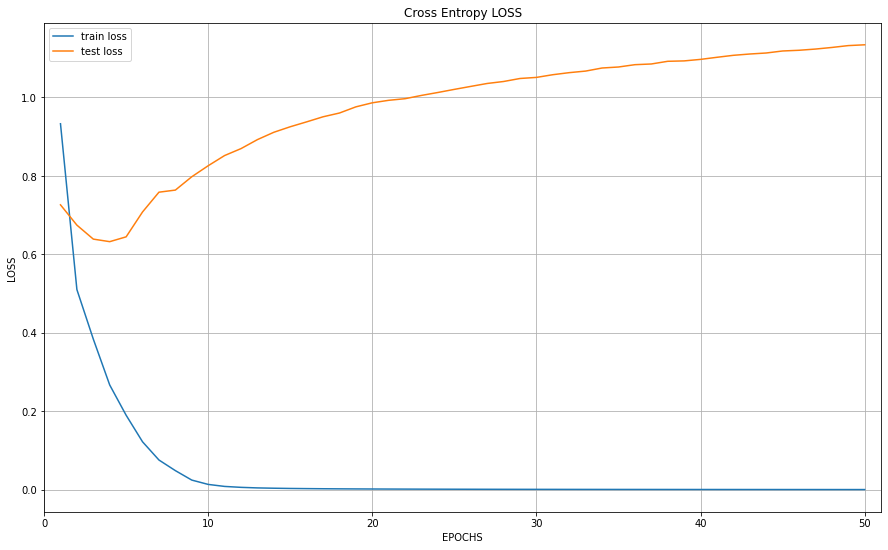

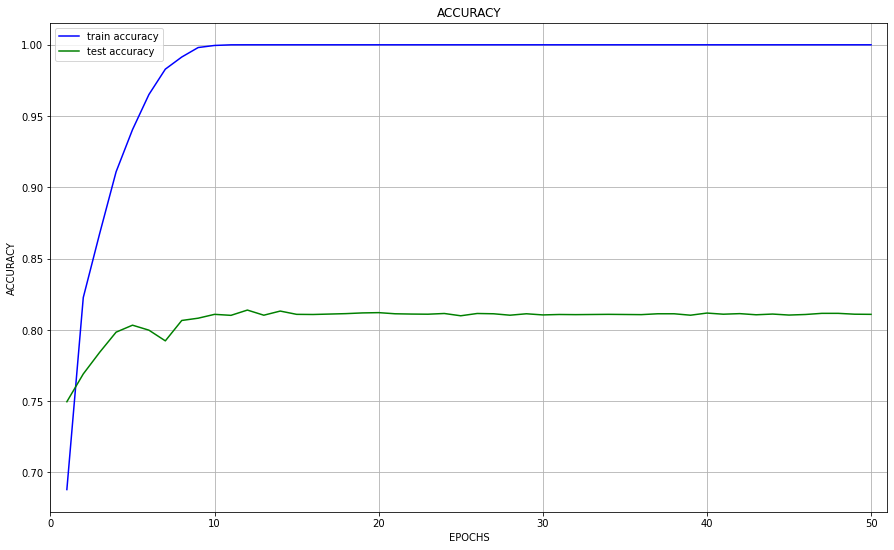

In [ ]:
loss=history_S_4.history['loss']
val_loss=history_S_4.history['val_loss']
acc=history_S_4.history['accuracy']
val_acc=history_S_4.history['val_accuracy']
EPOCH= range(1,Epoch + 1)

plt.gcf().set_size_inches(15,9,forward=True)
plt.plot(EPOCH,loss)
plt.plot(EPOCH,val_loss)
plt.title('Cross Entropy LOSS')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.grid()
plt.xlim([0,Epoch + 1])
plt.legend(['train loss','test loss'])
plt.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW3/Pic/S4los_c.jpg')
plt.show()
print(3*'\n')
print(3*'\n')
plt.gcf().set_size_inches(15,9,forward=True)
plt.plot(EPOCH,acc,color='b')
plt.plot(EPOCH,val_acc,color='g')
plt.title('ACCURACY')
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.grid()
plt.xlim([0,Epoch + 1])
plt.legend(['train accuracy','test accuracy'])
plt.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW3/Pic/S4ac_c.jpg')
plt.show()

In [ ]:
L_4= Sequential()
#L1:
L_4.add(Conv2D(filters = 64, kernel_size = 3, strides=(1, 1), padding="same", activation='relu',input_shape=(32, 32, 3)))
L_4.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
#L2:
L_4.add(Conv2D(filters = 128, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
L_4.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
#L3:
L_4.add(Conv2D(filters = 256, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))

#L4:
L_4.add(Conv2D(filters = 256, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
L_4.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

L_4.add(Flatten())

# set weights:

w1 = S_4.layers[0].get_weights()[0]
b1 = S_4.layers[0].get_weights()[1]
w2 = S_4.layers[2].get_weights()[0]
b2 = S_4.layers[2].get_weights()[1]
w3 = S_4.layers[4].get_weights()[0]
b3 = S_4.layers[4].get_weights()[1]
w4 = S_4.layers[5].get_weights()[0]
b4 = S_4.layers[5].get_weights()[1]
L_4.layers[0].set_weights([w1,b1])
L_4.layers[2].set_weights([w2,b2])
L_4.layers[4].set_weights([w3,b3])
L_4.layers[5].set_weights([w4,b4])


Embeding Space:

In [ ]:
emb_4 = L_4(X_subset_n)

Calculation of SI:

In [ ]:
SI(emb_4,y_subset)

0.499

### Stage 5:

Define Model For Learning:

In [ ]:
S_5= Sequential()
#L1:
S_5.add(Conv2D(filters = 64, kernel_size = 3, strides=(1, 1), padding="same", activation='relu',input_shape=(32, 32, 3)))
S_5.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#L2:
S_5.add(Conv2D(filters = 128, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
S_5.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#L3:
S_5.add(Conv2D(filters = 256, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))

#L4:
S_5.add(Conv2D(filters = 256, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
S_5.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#L5:
S_5.add(Conv2D(filters = 512, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))


#FC:
S_5.add(Flatten())
S_5.add(Dense(10))
S_5.add(Softmax(axis=1))

#Freezing:
w4 = S_4.layers[5].get_weights()[0]
b4 = S_4.layers[5].get_weights()[1]
w3 = S_4.layers[4].get_weights()[0]
b3 = S_4.layers[4].get_weights()[1]
w2 = S_4.layers[2].get_weights()[0]
b2 = S_4.layers[2].get_weights()[1]
w1 = S_4.layers[0].get_weights()[0]
b1 = S_4.layers[0].get_weights()[1]
S_5.layers[0].set_weights([w1,b1])
S_5.layers[2].set_weights([w2,b2])
S_5.layers[4].set_weights([w3,b3])
S_5.layers[5].set_weights([w4,b4])



sgd = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
S_5.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
S_5.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 8, 8, 256)         295168    
                                                                 
 conv2d_26 (Conv2D)          (None, 8, 8, 256)        

In [ ]:
Epoch =  50
history_S_5=S_5.fit(x=x_train_n,y=y_train_code, batch_size=256 , epochs=Epoch,validation_data=(x_test_n,y_test_code))

Epoch 1/50
196/196 [==============================] - 8s 36ms/step - loss: 0.6474 - accuracy: 0.7804 - val_loss: 0.7408 - val_accuracy: 0.7776
Epoch 2/50
196/196 [==============================] - 6s 33ms/step - loss: 0.1895 - accuracy: 0.9352 - val_loss: 0.7767 - val_accuracy: 0.7879
Epoch 3/50
196/196 [==============================] - 7s 34ms/step - loss: 0.0741 - accuracy: 0.9776 - val_loss: 0.8333 - val_accuracy: 0.8002
Epoch 4/50
196/196 [==============================] - 6s 33ms/step - loss: 0.0242 - accuracy: 0.9951 - val_loss: 0.9287 - val_accuracy: 0.8071
Epoch 5/50
196/196 [==============================] - 6s 33ms/step - loss: 0.0081 - accuracy: 0.9993 - val_loss: 0.9891 - val_accuracy: 0.8124
Epoch 6/50
196/196 [==============================] - 6s 33ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 1.0226 - val_accuracy: 0.8168
Epoch 7/50
196/196 [==============================] - 7s 33ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.0508 - val_accuracy: 0.8191

In [ ]:
S_5.save('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW3/Model/C/S_5.h5')

Plot Loss And Accuracy:

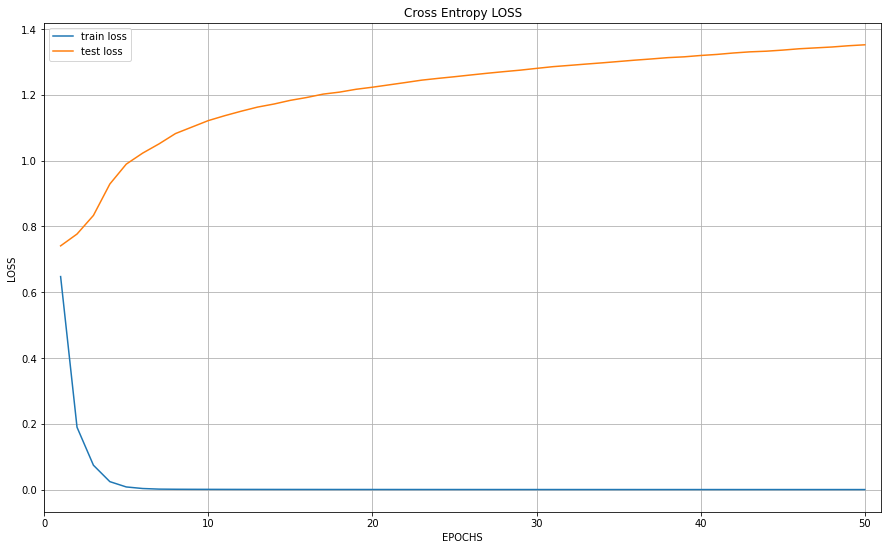

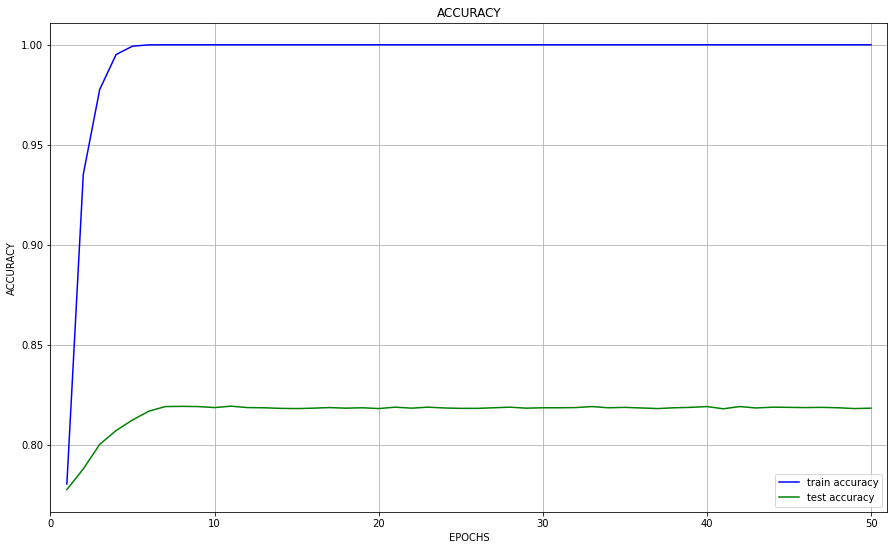

In [ ]:
loss=history_S_5.history['loss']
val_loss=history_S_5.history['val_loss']
acc=history_S_5.history['accuracy']
val_acc=history_S_5.history['val_accuracy']
EPOCH= range(1,Epoch + 1)

plt.gcf().set_size_inches(15,9,forward=True)
plt.plot(EPOCH,loss)
plt.plot(EPOCH,val_loss)
plt.title('Cross Entropy LOSS')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.grid()
plt.xlim([0,Epoch + 1])
plt.legend(['train loss','test loss'])
plt.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW3/Pic/S5los_c.jpg')
plt.show()
print(3*'\n')
print(3*'\n')
plt.gcf().set_size_inches(15,9,forward=True)
plt.plot(EPOCH,acc,color='b')
plt.plot(EPOCH,val_acc,color='g')
plt.title('ACCURACY')
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.grid()
plt.xlim([0,Epoch + 1])
plt.legend(['train accuracy','test accuracy'])
plt.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW3/Pic/S5ac_c.jpg')
plt.show()

In [ ]:
L_5= Sequential()
#L1:
L_5.add(Conv2D(filters = 64, kernel_size = 3, strides=(1, 1), padding="same", activation='relu',input_shape=(32, 32, 3)))
L_5.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
#L2:
L_5.add(Conv2D(filters = 128, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
L_5.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
#L3:
L_5.add(Conv2D(filters = 256, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))

#L4:
L_5.add(Conv2D(filters = 256, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
L_5.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#L5:
L_5.add(Conv2D(filters = 512, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))

L_5.add(Flatten())

# set weights:

w1 = S_5.layers[0].get_weights()[0]
b1 = S_5.layers[0].get_weights()[1]
w2 = S_5.layers[2].get_weights()[0]
b2 = S_5.layers[2].get_weights()[1]
w3 = S_5.layers[4].get_weights()[0]
b3 = S_5.layers[4].get_weights()[1]
w4 = S_5.layers[5].get_weights()[0]
b4 = S_5.layers[5].get_weights()[1]
w5 = S_5.layers[7].get_weights()[0]
b5 = S_5.layers[7].get_weights()[1]
L_5.layers[0].set_weights([w1,b1])
L_5.layers[2].set_weights([w2,b2])
L_5.layers[4].set_weights([w3,b3])
L_5.layers[5].set_weights([w4,b4])
L_5.layers[7].set_weights([w5,b5])

Embeding Space:

In [ ]:
emb_5 = L_5(X_subset_n)

Calculation of SI:

In [ ]:
SI(emb_5,y_subset)

0.607

### Stage 6:

Define Model For Learning:

In [ ]:
S_6= Sequential()
#L1:
S_6.add(Conv2D(filters = 64, kernel_size = 3, strides=(1, 1), padding="same", activation='relu',input_shape=(32, 32, 3)))
S_6.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#L2:
S_6.add(Conv2D(filters = 128, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
S_6.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#L3:
S_6.add(Conv2D(filters = 256, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))

#L4:
S_6.add(Conv2D(filters = 256, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
S_6.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#L5:
S_6.add(Conv2D(filters = 512, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))

#L6:
S_6.add(Conv2D(filters = 512, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
S_6.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))


#FC:
S_6.add(Flatten())
S_6.add(Dense(10))
S_6.add(Softmax(axis=1))

#Freezing:
w5 = S_5.layers[7].get_weights()[0]
b5 = S_5.layers[7].get_weights()[1]
w4 = S_5.layers[5].get_weights()[0]
b4 = S_5.layers[5].get_weights()[1]
w3 = S_5.layers[4].get_weights()[0]
b3 = S_5.layers[4].get_weights()[1]
w2 = S_5.layers[2].get_weights()[0]
b2 = S_5.layers[2].get_weights()[1]
w1 = S_5.layers[0].get_weights()[0]
b1 = S_5.layers[0].get_weights()[1]
S_6.layers[0].set_weights([w1,b1])
S_6.layers[2].set_weights([w2,b2])
S_6.layers[4].set_weights([w3,b3])
S_6.layers[5].set_weights([w4,b4])
S_6.layers[7].set_weights([w5,b5])



sgd = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
S_6.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
S_6.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 8, 8, 256)         295168    
                                                                 
 conv2d_36 (Conv2D)          (None, 8, 8, 256)       

In [ ]:
Epoch =  50
history_S_6=S_6.fit(x=x_train_n,y=y_train_code, batch_size=256 , epochs=Epoch,validation_data=(x_test_n,y_test_code))

Epoch 1/50
196/196 [==============================] - 10s 45ms/step - loss: 2.4706 - accuracy: 0.2162 - val_loss: 1.6606 - val_accuracy: 0.3670
Epoch 2/50
196/196 [==============================] - 8s 42ms/step - loss: 1.4345 - accuracy: 0.4731 - val_loss: 1.2248 - val_accuracy: 0.5501
Epoch 3/50
196/196 [==============================] - 8s 42ms/step - loss: 1.1060 - accuracy: 0.6010 - val_loss: 1.0018 - val_accuracy: 0.6446
Epoch 4/50
196/196 [==============================] - 8s 42ms/step - loss: 0.8889 - accuracy: 0.6835 - val_loss: 0.8768 - val_accuracy: 0.6917
Epoch 5/50
196/196 [==============================] - 8s 41ms/step - loss: 0.7511 - accuracy: 0.7376 - val_loss: 0.7721 - val_accuracy: 0.7321
Epoch 6/50
196/196 [==============================] - 8s 41ms/step - loss: 0.6400 - accuracy: 0.7738 - val_loss: 0.7462 - val_accuracy: 0.7426
Epoch 7/50
196/196 [==============================] - 8s 42ms/step - loss: 0.5567 - accuracy: 0.8062 - val_loss: 0.7342 - val_accuracy: 0.744

In [ ]:
S_6.save('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW3/Model/C/S_6.h5')

Plot Loss And Accuracy:

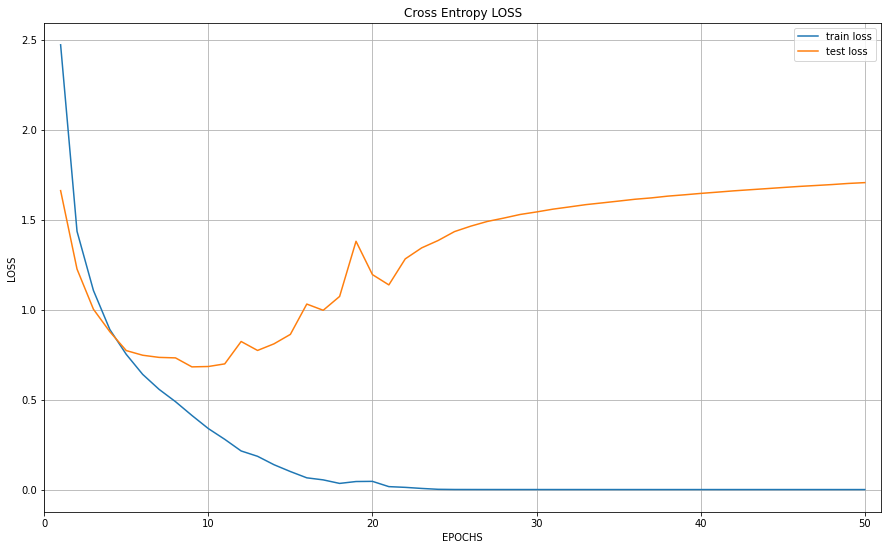

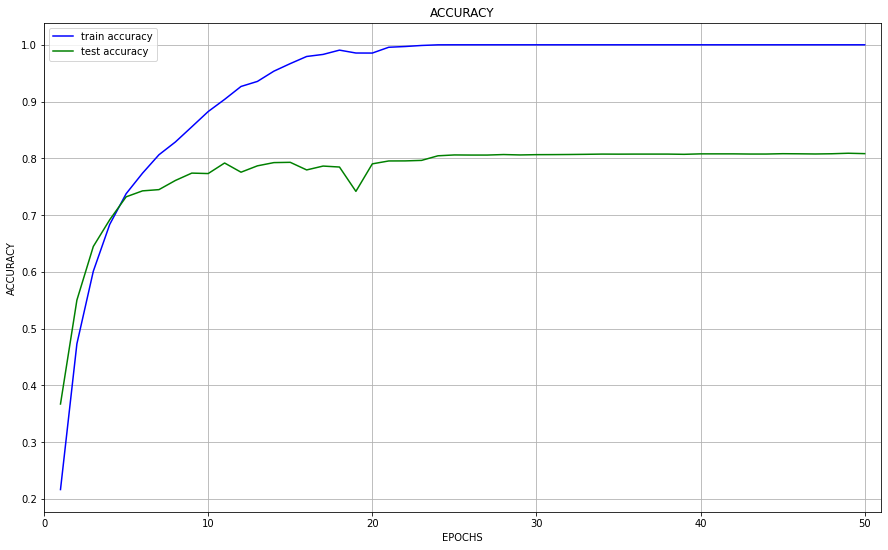

In [ ]:
loss=history_S_6.history['loss']
val_loss=history_S_6.history['val_loss']
acc=history_S_6.history['accuracy']
val_acc=history_S_6.history['val_accuracy']
EPOCH= range(1,Epoch + 1)

plt.gcf().set_size_inches(15,9,forward=True)
plt.plot(EPOCH,loss)
plt.plot(EPOCH,val_loss)
plt.title('Cross Entropy LOSS')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.grid()
plt.xlim([0,Epoch + 1])
plt.legend(['train loss','test loss'])
plt.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW3/Pic/S6los_c.jpg')
plt.show()
print(3*'\n')
print(3*'\n')
plt.gcf().set_size_inches(15,9,forward=True)
plt.plot(EPOCH,acc,color='b')
plt.plot(EPOCH,val_acc,color='g')
plt.title('ACCURACY')
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.grid()
plt.xlim([0,Epoch + 1])
plt.legend(['train accuracy','test accuracy'])
plt.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW3/Pic/S6ac_c.jpg')
plt.show()

In [ ]:
L_6= Sequential()
#L1:
L_6.add(Conv2D(filters = 64, kernel_size = 3, strides=(1, 1), padding="same", activation='relu',input_shape=(32, 32, 3)))
L_6.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
#L2:
L_6.add(Conv2D(filters = 128, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
L_6.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
#L3:
L_6.add(Conv2D(filters = 256, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))

#L4:
L_6.add(Conv2D(filters = 256, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
L_6.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#L5:
L_6.add(Conv2D(filters = 512, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))

#L6:
L_6.add(Conv2D(filters = 512, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
L_6.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

L_6.add(Flatten())

# set weights:

w1 = S_6.layers[0].get_weights()[0]
b1 = S_6.layers[0].get_weights()[1]
w2 = S_6.layers[2].get_weights()[0]
b2 = S_6.layers[2].get_weights()[1]
w3 = S_6.layers[4].get_weights()[0]
b3 = S_6.layers[4].get_weights()[1]
w4 = S_6.layers[5].get_weights()[0]
b4 = S_6.layers[5].get_weights()[1]
w5 = S_6.layers[7].get_weights()[0]
b5 = S_6.layers[7].get_weights()[1]
w6 = S_6.layers[8].get_weights()[0]
b6 = S_6.layers[8].get_weights()[1]
L_6.layers[0].set_weights([w1,b1])
L_6.layers[2].set_weights([w2,b2])
L_6.layers[4].set_weights([w3,b3])
L_6.layers[5].set_weights([w4,b4])
L_6.layers[7].set_weights([w5,b5])
L_6.layers[8].set_weights([w6,b6])

Embeding Space:

In [ ]:
emb_6 = L_6(X_subset_n)

Calculation of SI:

In [ ]:
SI(emb_6,y_subset)

0.687

### Stage 7:

Define Model For Learning:

In [ ]:
S_7= Sequential()
#L1:
S_7.add(Conv2D(filters = 64, kernel_size = 3, strides=(1, 1), padding="same", activation='relu',input_shape=(32, 32, 3)))
S_7.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#L2:
S_7.add(Conv2D(filters = 128, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
S_7.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#L3:
S_7.add(Conv2D(filters = 256, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))

#L4:
S_7.add(Conv2D(filters = 256, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
S_7.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#L5:
S_7.add(Conv2D(filters = 512, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))

#L6:
S_7.add(Conv2D(filters = 512, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
S_7.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#L7:
S_7.add(Conv2D(filters = 512, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))


#FC:
S_7.add(Flatten())
S_7.add(Dense(10))
S_7.add(Softmax(axis=1))

#Freezing:
w6 = S_6.layers[8].get_weights()[0]
b6 = S_6.layers[8].get_weights()[1]
w5 = S_6.layers[7].get_weights()[0]
b5 = S_6.layers[7].get_weights()[1]
w4 = S_6.layers[5].get_weights()[0]
b4 = S_6.layers[5].get_weights()[1]
w3 = S_6.layers[4].get_weights()[0]
b3 = S_6.layers[4].get_weights()[1]
w2 = S_6.layers[2].get_weights()[0]
b2 = S_6.layers[2].get_weights()[1]
w1 = S_6.layers[0].get_weights()[0]
b1 = S_6.layers[0].get_weights()[1]
S_7.layers[0].set_weights([w1,b1])
S_7.layers[2].set_weights([w2,b2])
S_7.layers[4].set_weights([w3,b3])
S_7.layers[5].set_weights([w4,b4])
S_7.layers[7].set_weights([w5,b5])
S_7.layers[8].set_weights([w6,b6])


sgd = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
S_7.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
S_7.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_51 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_52 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_53 (Conv2D)          (None, 8, 8, 256)         295168    
                                                                 
 conv2d_54 (Conv2D)          (None, 8, 8, 256)       

In [ ]:
Epoch =  50
history_S_7=S_7.fit(x=x_train_n,y=y_train_code, batch_size=256 , epochs=Epoch,validation_data=(x_test_n,y_test_code))

Epoch 1/50
196/196 [==============================] - 11s 52ms/step - loss: 0.1898 - accuracy: 0.9439 - val_loss: 1.0028 - val_accuracy: 0.7921
Epoch 2/50
196/196 [==============================] - 10s 50ms/step - loss: 0.0126 - accuracy: 0.9979 - val_loss: 1.2103 - val_accuracy: 0.7957
Epoch 3/50
196/196 [==============================] - 10s 50ms/step - loss: 0.0099 - accuracy: 0.9980 - val_loss: 1.2646 - val_accuracy: 0.8008
Epoch 4/50
196/196 [==============================] - 10s 49ms/step - loss: 0.0051 - accuracy: 0.9993 - val_loss: 1.2983 - val_accuracy: 0.7944
Epoch 5/50
196/196 [==============================] - 9s 48ms/step - loss: 0.0014 - accuracy: 0.9999 - val_loss: 1.3960 - val_accuracy: 0.8034
Epoch 6/50
196/196 [==============================] - 9s 48ms/step - loss: 3.9550e-04 - accuracy: 1.0000 - val_loss: 1.4581 - val_accuracy: 0.8037
Epoch 7/50
196/196 [==============================] - 9s 48ms/step - loss: 2.8431e-04 - accuracy: 1.0000 - val_loss: 1.4946 - val_accu

In [ ]:
S_7.save('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW3/Model/C/S_7.h5')

Plot Loss And Accuracy:

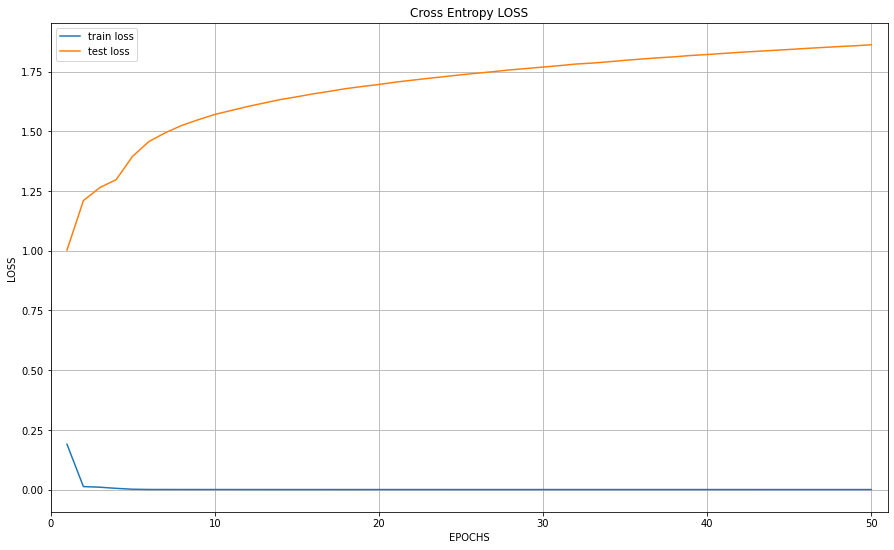

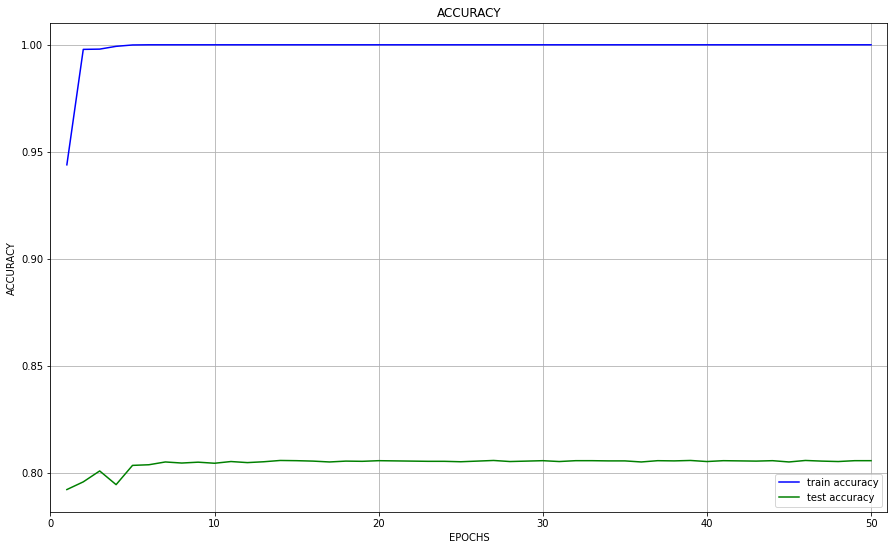

In [ ]:
loss=history_S_7.history['loss']
val_loss=history_S_7.history['val_loss']
acc=history_S_7.history['accuracy']
val_acc=history_S_7.history['val_accuracy']
EPOCH= range(1,Epoch + 1)

plt.gcf().set_size_inches(15,9,forward=True)
plt.plot(EPOCH,loss)
plt.plot(EPOCH,val_loss)
plt.title('Cross Entropy LOSS')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.grid()
plt.xlim([0,Epoch + 1])
plt.legend(['train loss','test loss'])
plt.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW3/Pic/S7los_c.jpg')
plt.show()
print(3*'\n')
print(3*'\n')
plt.gcf().set_size_inches(15,9,forward=True)
plt.plot(EPOCH,acc,color='b')
plt.plot(EPOCH,val_acc,color='g')
plt.title('ACCURACY')
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.grid()
plt.xlim([0,Epoch + 1])
plt.legend(['train accuracy','test accuracy'])
plt.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW3/Pic/S7ac_c.jpg')
plt.show()

In [ ]:
L_7= Sequential()
#L1:
L_7.add(Conv2D(filters = 64, kernel_size = 3, strides=(1, 1), padding="same", activation='relu',input_shape=(32, 32, 3)))
L_7.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
#L2:
L_7.add(Conv2D(filters = 128, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
L_7.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
#L3:
L_7.add(Conv2D(filters = 256, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))

#L4:
L_7.add(Conv2D(filters = 256, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
L_7.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#L5:
L_7.add(Conv2D(filters = 512, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))

#L6:
L_7.add(Conv2D(filters = 512, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
L_7.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#L7:
L_7.add(Conv2D(filters = 512, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))

L_7.add(Flatten())

# set weights:

w1 = S_7.layers[0].get_weights()[0]
b1 = S_7.layers[0].get_weights()[1]
w2 = S_7.layers[2].get_weights()[0]
b2 = S_7.layers[2].get_weights()[1]
w3 = S_7.layers[4].get_weights()[0]
b3 = S_7.layers[4].get_weights()[1]
w4 = S_7.layers[5].get_weights()[0]
b4 = S_7.layers[5].get_weights()[1]
w5 = S_7.layers[7].get_weights()[0]
b5 = S_7.layers[7].get_weights()[1]
w6 = S_7.layers[8].get_weights()[0]
b6 = S_7.layers[8].get_weights()[1]
w7 = S_7.layers[10].get_weights()[0]
b7 = S_7.layers[10].get_weights()[1]
L_7.layers[0].set_weights([w1,b1])
L_7.layers[2].set_weights([w2,b2])
L_7.layers[4].set_weights([w3,b3])
L_7.layers[5].set_weights([w4,b4])
L_7.layers[7].set_weights([w5,b5])
L_7.layers[8].set_weights([w6,b6])
L_7.layers[10].set_weights([w7,b7])

Embeding Space:

In [ ]:
emb_7 = L_7(X_subset_n)

Calculation of SI:

In [ ]:
SI(emb_7,y_subset)

0.715

### Stage 8:

Define Model For Learning:

In [ ]:
S_8= Sequential()
#L1:
S_8.add(Conv2D(filters = 64, kernel_size = 3, strides=(1, 1), padding="same", activation='relu',input_shape=(32, 32, 3)))
S_8.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#L2:
S_8.add(Conv2D(filters = 128, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
S_8.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#L3:
S_8.add(Conv2D(filters = 256, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))

#L4:
S_8.add(Conv2D(filters = 256, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
S_8.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#L5:
S_8.add(Conv2D(filters = 512, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))

#L6:
S_8.add(Conv2D(filters = 512, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
S_8.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#L7:
S_8.add(Conv2D(filters = 512, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))

#L8:
S_8.add(Conv2D(filters = 512, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
S_8.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))


#FC:
S_8.add(Flatten())
S_8.add(Dense(10))
S_8.add(Softmax(axis=1))

#Freezing:
w7 = S_7.layers[10].get_weights()[0]
b7 = S_7.layers[10].get_weights()[1]
w6 = S_7.layers[8].get_weights()[0]
b6 = S_7.layers[8].get_weights()[1]
w5 = S_7.layers[7].get_weights()[0]
b5 = S_7.layers[7].get_weights()[1]
w4 = S_7.layers[5].get_weights()[0]
b4 = S_7.layers[5].get_weights()[1]
w3 = S_7.layers[4].get_weights()[0]
b3 = S_7.layers[4].get_weights()[1]
w2 = S_7.layers[2].get_weights()[0]
b2 = S_7.layers[2].get_weights()[1]
w1 = S_7.layers[0].get_weights()[0]
b1 = S_7.layers[0].get_weights()[1]
S_8.layers[0].set_weights([w1,b1])
S_8.layers[2].set_weights([w2,b2])
S_8.layers[4].set_weights([w3,b3])
S_8.layers[5].set_weights([w4,b4])
S_8.layers[7].set_weights([w5,b5])
S_8.layers[8].set_weights([w6,b6])
S_8.layers[10].set_weights([w7,b7])



sgd = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
S_8.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
S_8.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_65 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_66 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_67 (Conv2D)          (None, 8, 8, 256)         295168    
                                                                 
 conv2d_68 (Conv2D)          (None, 8, 8, 256)       

In [ ]:
Epoch =  50
history_S_8=S_8.fit(x=x_train_n,y=y_train_code, batch_size=256 , epochs=Epoch,validation_data=(x_test_n,y_test_code))

Epoch 1/50
196/196 [==============================] - 12s 58ms/step - loss: 0.8764 - accuracy: 0.7115 - val_loss: 0.9009 - val_accuracy: 0.7700
Epoch 2/50
196/196 [==============================] - 11s 58ms/step - loss: 0.1353 - accuracy: 0.9529 - val_loss: 1.1015 - val_accuracy: 0.7775
Epoch 3/50
196/196 [==============================] - 11s 58ms/step - loss: 0.0495 - accuracy: 0.9829 - val_loss: 1.2471 - val_accuracy: 0.7875
Epoch 4/50
196/196 [==============================] - 11s 57ms/step - loss: 0.0423 - accuracy: 0.9858 - val_loss: 1.2669 - val_accuracy: 0.7816
Epoch 5/50
196/196 [==============================] - 11s 57ms/step - loss: 0.0390 - accuracy: 0.9867 - val_loss: 1.3334 - val_accuracy: 0.7859
Epoch 6/50
196/196 [==============================] - 11s 56ms/step - loss: 0.0392 - accuracy: 0.9869 - val_loss: 1.4425 - val_accuracy: 0.7909
Epoch 7/50
196/196 [==============================] - 11s 56ms/step - loss: 0.0286 - accuracy: 0.9897 - val_loss: 1.2663 - val_accuracy:

In [ ]:
S_8.save('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW3/Model/C/S_8.h5')

Plot Loss And Accuracy:

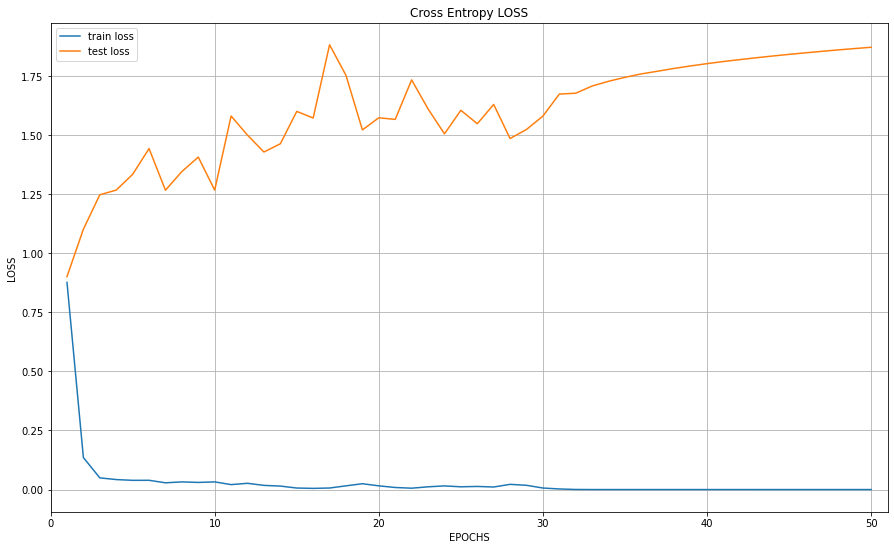

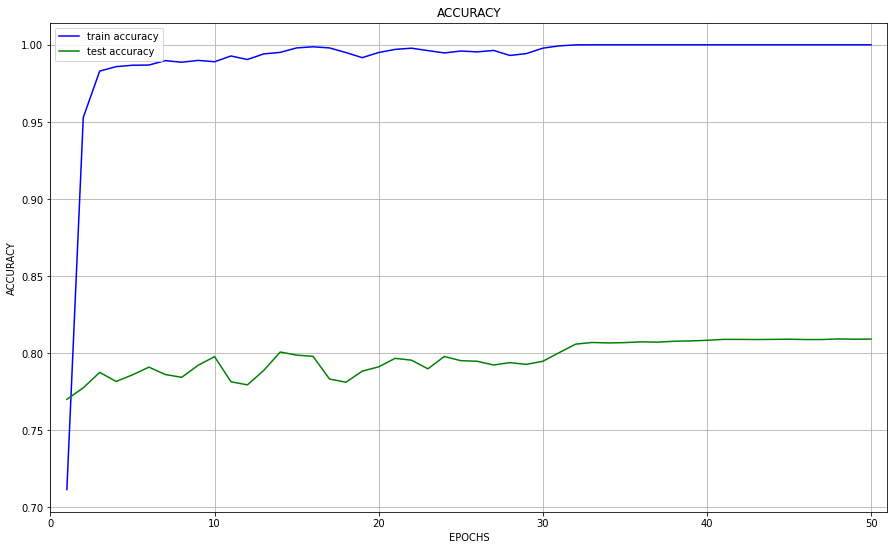

In [ ]:
loss=history_S_8.history['loss']
val_loss=history_S_8.history['val_loss']
acc=history_S_8.history['accuracy']
val_acc=history_S_8.history['val_accuracy']
EPOCH= range(1,Epoch + 1)

plt.gcf().set_size_inches(15,9,forward=True)
plt.plot(EPOCH,loss)
plt.plot(EPOCH,val_loss)
plt.title('Cross Entropy LOSS')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.grid()
plt.xlim([0,Epoch + 1])
plt.legend(['train loss','test loss'])
plt.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW3/Pic/S8los_c.jpg')
plt.show()
print(3*'\n')
print(3*'\n')
plt.gcf().set_size_inches(15,9,forward=True)
plt.plot(EPOCH,acc,color='b')
plt.plot(EPOCH,val_acc,color='g')
plt.title('ACCURACY')
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.grid()
plt.xlim([0,Epoch + 1])
plt.legend(['train accuracy','test accuracy'])
plt.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW3/Pic/S8ac_c.jpg')
plt.show()

In [ ]:
L_8= Sequential()
#L1:
L_8.add(Conv2D(filters = 64, kernel_size = 3, strides=(1, 1), padding="same", activation='relu',input_shape=(32, 32, 3)))
L_8.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
#L2:
L_8.add(Conv2D(filters = 128, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
L_8.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
#L3:
L_8.add(Conv2D(filters = 256, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))

#L4:
L_8.add(Conv2D(filters = 256, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
L_8.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#L5:
L_8.add(Conv2D(filters = 512, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))

#L6:
L_8.add(Conv2D(filters = 512, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
L_8.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#L7:
L_8.add(Conv2D(filters = 512, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))

#L8:
L_8.add(Conv2D(filters = 512, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
L_8.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

L_8.add(Flatten())

# set weights:

w1 = S_8.layers[0].get_weights()[0]
b1 = S_8.layers[0].get_weights()[1]
w2 = S_8.layers[2].get_weights()[0]
b2 = S_8.layers[2].get_weights()[1]
w3 = S_8.layers[4].get_weights()[0]
b3 = S_8.layers[4].get_weights()[1]
w4 = S_8.layers[5].get_weights()[0]
b4 = S_8.layers[5].get_weights()[1]
w5 = S_8.layers[7].get_weights()[0]
b5 = S_8.layers[7].get_weights()[1]
w6 = S_8.layers[8].get_weights()[0]
b6 = S_8.layers[8].get_weights()[1]
w7 = S_8.layers[10].get_weights()[0]
b7 = S_8.layers[10].get_weights()[1]
w8 = S_8.layers[11].get_weights()[0]
b8 = S_8.layers[11].get_weights()[1]
L_8.layers[0].set_weights([w1,b1])
L_8.layers[2].set_weights([w2,b2])
L_8.layers[4].set_weights([w3,b3])
L_8.layers[5].set_weights([w4,b4])
L_8.layers[7].set_weights([w5,b5])
L_8.layers[8].set_weights([w6,b6])
L_8.layers[10].set_weights([w7,b7])
L_8.layers[11].set_weights([w8,b8])

Embeding Space:

In [ ]:
emb_8 = L_8(X_subset_n)

Calculation of SI:

In [ ]:

SI(emb_8,y_subset)

0.704

### Fine Tune With Fully Connected:

Define Model For Learning:

In [ ]:
S_f= Sequential()
#L1:
S_f.add(Conv2D(filters = 64, kernel_size = 3, strides=(1, 1), padding="same", activation='relu',input_shape=(32, 32, 3)))
S_f.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#L2:
S_f.add(Conv2D(filters = 128, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
S_f.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#L3:
S_f.add(Conv2D(filters = 256, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))

#L4:
S_f.add(Conv2D(filters = 256, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
S_f.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#L5:
S_f.add(Conv2D(filters = 512, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))

#L6:
S_f.add(Conv2D(filters = 512, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
S_f.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

#L7:
S_f.add(Conv2D(filters = 512, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))

#L8:
S_f.add(Conv2D(filters = 512, kernel_size = 3, strides=(1, 1), padding="same", activation='relu'))
S_f.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))


#FC:
S_f.add(Flatten())
S_f.add(Dense(4096, activation='relu'))
S_f.add(Dense(4096, activation='relu'))
S_f.add(Dense(10))
S_f.add(Softmax(axis=1))

#Freezing:
w8 = S_8.layers[11].get_weights()[0]
b8 = S_8.layers[11].get_weights()[1]
w7 = S_8.layers[10].get_weights()[0]
b7 = S_8.layers[10].get_weights()[1]
w6 = S_8.layers[8].get_weights()[0]
b6 = S_8.layers[8].get_weights()[1]
w5 = S_8.layers[7].get_weights()[0]
b5 = S_8.layers[7].get_weights()[1]
w4 = S_8.layers[5].get_weights()[0]
b4 = S_8.layers[5].get_weights()[1]
w3 = S_8.layers[4].get_weights()[0]
b3 = S_8.layers[4].get_weights()[1]
w2 = S_8.layers[2].get_weights()[0]
b2 = S_8.layers[2].get_weights()[1]
w1 = S_8.layers[0].get_weights()[0]
b1 = S_8.layers[0].get_weights()[1]
S_f.layers[0].set_weights([w1,b1])
S_f.layers[2].set_weights([w2,b2])
S_f.layers[4].set_weights([w3,b3])
S_f.layers[5].set_weights([w4,b4])
S_f.layers[7].set_weights([w5,b5])
S_f.layers[8].set_weights([w6,b6])
S_f.layers[10].set_weights([w7,b7])
S_f.layers[11].set_weights([w8,b8])



sgd = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
S_f.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
S_f.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_97 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_64 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_98 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_65 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_99 (Conv2D)          (None, 8, 8, 256)         295168    
                                                                 
 conv2d_100 (Conv2D)         (None, 8, 8, 256)       

In [ ]:
Epoch =  50
history_S_f=S_f.fit(x=x_train_n,y=y_train_code, batch_size=256 , epochs=Epoch,validation_data=(x_test_n,y_test_code))

Epoch 1/50
196/196 [==============================] - 15s 72ms/step - loss: 0.0324 - accuracy: 0.9913 - val_loss: 1.3194 - val_accuracy: 0.8087
Epoch 2/50
196/196 [==============================] - 14s 69ms/step - loss: 1.9803e-04 - accuracy: 1.0000 - val_loss: 1.3713 - val_accuracy: 0.8090
Epoch 3/50
196/196 [==============================] - 14s 70ms/step - loss: 1.0232e-04 - accuracy: 1.0000 - val_loss: 1.4172 - val_accuracy: 0.8112
Epoch 4/50
196/196 [==============================] - 13s 67ms/step - loss: 7.6081e-05 - accuracy: 1.0000 - val_loss: 1.4500 - val_accuracy: 0.8116
Epoch 5/50
196/196 [==============================] - 13s 67ms/step - loss: 6.1405e-05 - accuracy: 1.0000 - val_loss: 1.4782 - val_accuracy: 0.8119
Epoch 6/50
196/196 [==============================] - 13s 67ms/step - loss: 5.1499e-05 - accuracy: 1.0000 - val_loss: 1.5011 - val_accuracy: 0.8120
Epoch 7/50
196/196 [==============================] - 13s 67ms/step - loss: 4.4522e-05 - accuracy: 1.0000 - val_loss

In [ ]:
S_f.save('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW3/Model/C/S_f.h5')

Plot Loss And Accuracy:

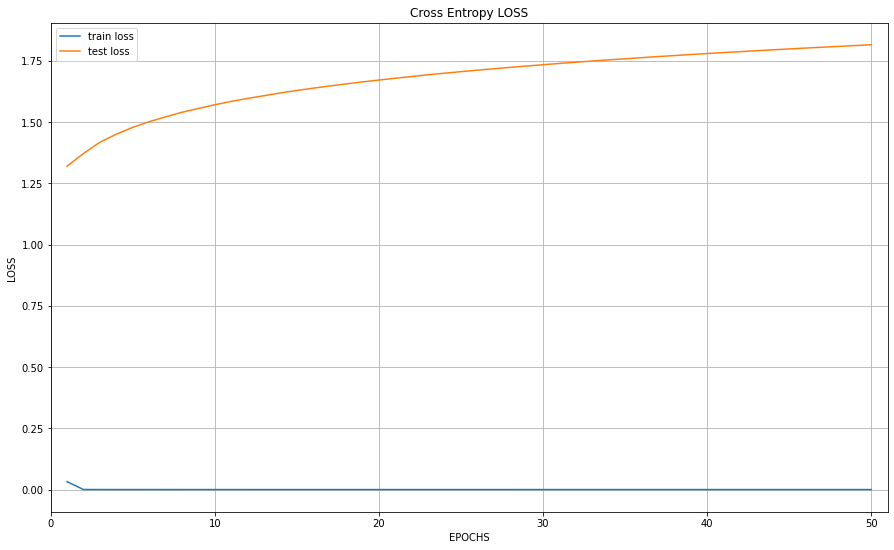

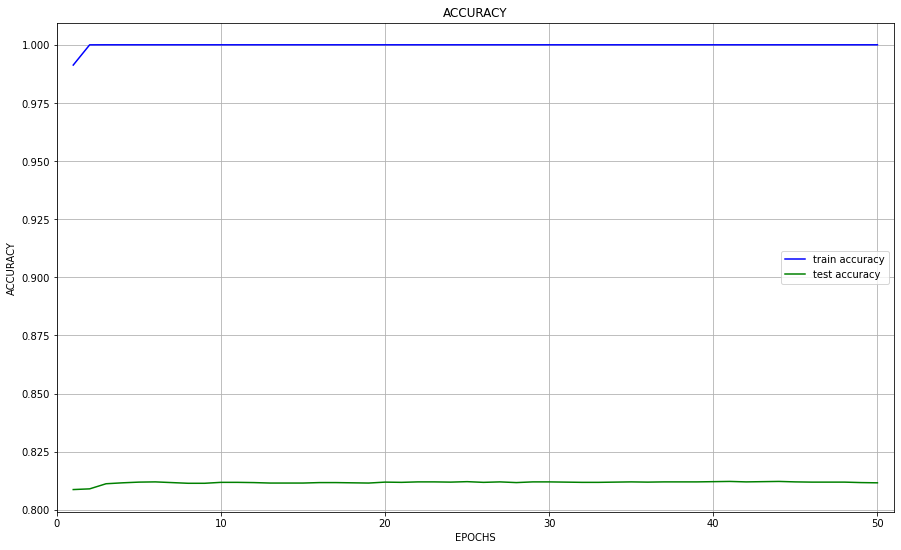

In [ ]:
loss=history_S_f.history['loss']
val_loss=history_S_f.history['val_loss']
acc=history_S_f.history['accuracy']
val_acc=history_S_f.history['val_accuracy']
EPOCH= range(1,Epoch + 1)

plt.gcf().set_size_inches(15,9,forward=True)
plt.plot(EPOCH,loss)
plt.plot(EPOCH,val_loss)
plt.title('Cross Entropy LOSS')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.grid()
plt.xlim([0,Epoch + 1])
plt.legend(['train loss','test loss'])
plt.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW3/Pic/Sflos_c.jpg')
plt.show()
print(3*'\n')
print(3*'\n')
plt.gcf().set_size_inches(15,9,forward=True)
plt.plot(EPOCH,acc,color='b')
plt.plot(EPOCH,val_acc,color='g')
plt.title('ACCURACY')
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.grid()
plt.xlim([0,Epoch + 1])
plt.legend(['train accuracy','test accuracy'])
plt.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW3/Pic/Sfac_c.jpg')
plt.show()

Embeding Space:

In [ ]:
embed_model_f1 = Model(inputs = S_f.input, outputs = S_f.layers[14].output)
emb_9 = embed_model_f1(X_subset_n)
embed_model_f2 = Model(inputs = S_f.input, outputs = S_f.layers[15].output)
emb_10 = embed_model_f2(X_subset_n)
embed_model_f3 = Model(inputs = S_f.input, outputs = S_f.layers[16].output)
emb_11 = embed_model_f3(X_subset_n)

Calculation of SI:

Layer #9:

In [ ]:
SI(emb_9,y_subset)

0.713

Layer #10:

In [ ]:
SI(emb_10,y_subset)

0.713

Layer #11:

In [ ]:
SI(emb_11,y_subset)

0.718

Plot SI vs Layers:

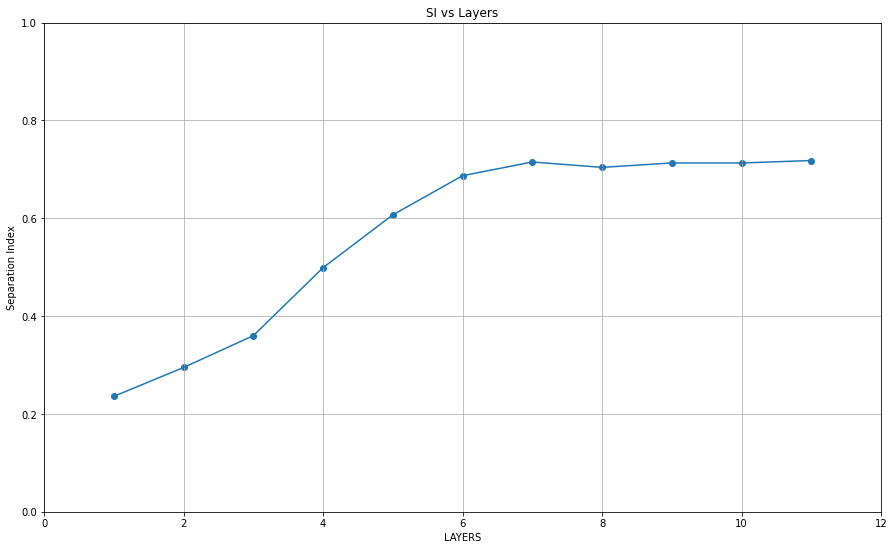

In [ ]:
SI_list=[0.236,0.295,0.36,0.499,0.607,0.687,0.715,0.704,0.713,0.713,0.718]
layer= range(1,12)
plt.gcf().set_size_inches(15,9,forward=True)
plt.plot(layer,SI_list)
plt.scatter(layer,SI_list)
plt.title('SI vs Layers')
plt.xlabel('LAYERS')
plt.ylabel('Separation Index')
plt.grid()
plt.xlim([0,12])
plt.ylim([0,1])
plt.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW3/Pic/SI_c.jpg')
plt.show()

Plot SI vs Layers For Part B And Part C:

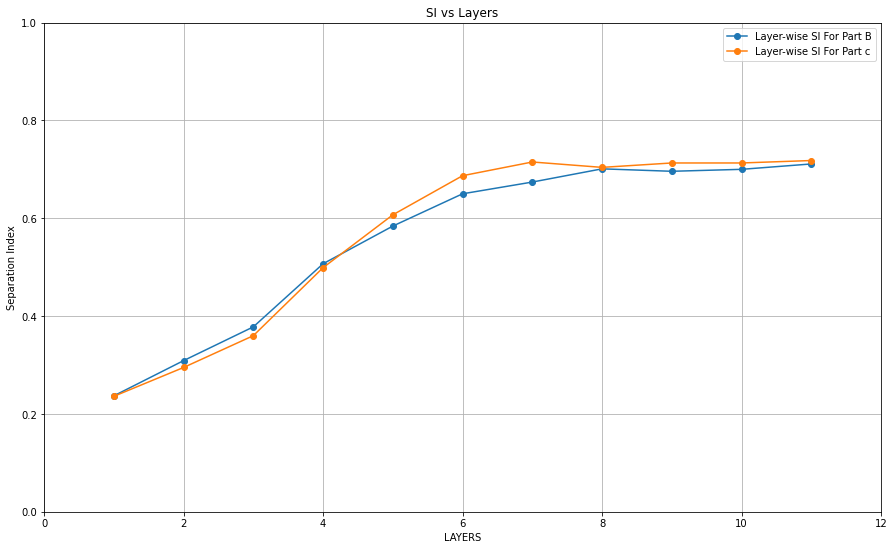

In [ ]:
SI_C=[0.236,0.295,0.36,0.499,0.607,0.687,0.715,0.704,0.713,0.713,0.718]
SI_B=[0.237,0.309,0.378,0.507,0.584,0.65,0.674,0.701,0.696,0.7,0.711]
layer= range(1,12)
plt.gcf().set_size_inches(15,9,forward=True)
plt.plot(layer,SI_B,"-o")
plt.plot(layer,SI_C,"-o")
plt.title('SI vs Layers')
plt.xlabel('LAYERS')
plt.ylabel('Separation Index')
plt.legend(["Layer-Wise SI For Part B","Layer-Wise SI For Part c"])
plt.grid()
plt.xlim([0,12])
plt.ylim([0,1])
plt.savefig('/content/drive/MyDrive/Design and Analysis of Deep Neural Networks/HW3/Pic/SI.jpg')
plt.show()